###### Importing libraries:

In [314]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
% matplotlib inline

In [315]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


###### Reading in both test and train files

In [316]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [317]:
# Check data frame sizes:
train.shape  # 1460 by 81

(1460, 81)

In [318]:
test.shape   # 1459 by 80 - why only 80 columns?

(1459, 80)

In [319]:
# saving sample size as N for train and N2 for test:
N = train.shape[0]
N

1460

In [320]:
N2 = test.shape[0]
N2

1459

In [321]:
# Because test, unlike train, doesn't have the very last variable - SalePrice
# list(train)
# list(test)

In [322]:
# Checking column types:
# train.dtypes   # 81 columns

In [323]:
# test.dtypes   # 80 columns

#### MISSING DATA

In [324]:
# How many missings in each column?
# misscounts = np.sum(train.isnull(), axis=0)/N*100
#print(misscounts[40:60].round(2))
# LotFrontage      17.7%
# Alley            93.8% - not really missings, NA = no alley access to property
# MasVnrType        0.5% (8 houses)
# MasVnrArea        0.5% (8 houses)
# BsmtQual          2.5%
# BsmtCond          2.5%
# BsmtExposure      2.6%
# BsmtFinType1      2.5%
# BsmtFinType2      2.6%
# Electrical        0.1% (1 house)
# FireplaceQu      47.3%
# GarageType        5.5%
# GarageYrBlt       5.5%
# GarageFinish      5.5%
# GarageQual        5.5%
# GarageCond        5.5%
# PoolQC           99.5%
# Fence            80.8%
# MiscFeature      96.3%

In [325]:
misscounts2 = np.sum(test.isnull(), axis=0)/N2*100
# print(misscounts2[40:].round(2))
# In addition to the above, has missings in:
# MSZoning          0.27% - 4 houses
# Utilities         0.14% - 2 houses
# Exterior1st       0.07% - 1 house
# Exterior2nd       0.07%
# BsmtFinSF1        0.07%
# BsmtFinSF2        0.07%
# BsmtUnfSF         0.07%
# TotalBsmtSF       0.07%
# BsmtFullBath      0.14%
# BsmtHalfBath      0.14%
# KitchenQual       0.07%
# Functional        0.14%
# GarageCars        0.07%
# GarageArea        0.07%
# SaleType          0.07%

#### Checking number of levels for categorical predictors

###### MSSubClass: The building class (originally integer):

Built dummies forthe levels with the highest incidence

In [326]:
# Observations in each level of MSSubClass (% of total):
(train.MSSubClass.value_counts().sort_values(ascending = False)/N*100).round(2)

20     36.71
60     20.48
50      9.86
120     5.96
30      4.73
160     4.32
70      4.11
80      3.97
90      3.56
190     2.05
85      1.37
75      1.10
45      0.82
180     0.68
40      0.27
Name: MSSubClass, dtype: float64

In [327]:
# test dataset has one extra value (150) with only one observation:
(test.MSSubClass.value_counts().sort_values(ascending = False)/N*100).round(2)

20     37.19
60     18.90
50      9.79
120     6.51
30      4.79
70      4.66
160     4.45
80      4.11
90      3.90
190     2.12
85      1.92
75      0.48
180     0.48
45      0.41
40      0.14
150     0.07
Name: MSSubClass, dtype: float64

In [328]:
# Build dummies for some classes (with somewhat decent incidence levels):
myclasses = [20, 60, 50, 120, 30, 70, 160, 80, 90, 190, 85]

In [329]:
for cl in myclasses:
    forname = 'class_' + str(cl)
    train[forname] = 0
    test[forname] = 0
    train.loc[train.MSSubClass == cl, forname] = 1
    test.loc[test.MSSubClass == cl, forname] = 1

In [330]:
pd.crosstab(train.class_190, train.MSSubClass)

MSSubClass,20,30,40,45,50,60,70,75,80,85,90,120,160,180,190
class_190,,,,,,,,,,,,,,,
0,536,69,4,12,144,299,60,16,58,20,52,87,63,10,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30


In [331]:
pd.crosstab(test.class_160, test.MSSubClass)

MSSubClass,20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190
class_160,,,,,,,,,,,,,,,,
0,543,70,2,6,143,276,68,7,60,28,57,95,1,0,7,31
1,0,0,0,0,0,0,0,0,0,0,0,0,0,65,0,0


In [332]:
print(train.shape)
print(test.shape)

(1460, 92)
(1459, 91)


###### MSZoning: The general zoning classification (currently object)

Built dummies for levels RL (Residential Low Density), RM (Residential Medium Density), FV (Floating Village Residential)?

In [333]:
# Observations in each level of MSZoning (%):
(train.MSZoning.value_counts().sort_values(ascending = False)/N*100).round(2)

RL         78.84
RM         14.93
FV          4.45
RH          1.10
C (all)     0.68
Name: MSZoning, dtype: float64

In [334]:
# Variable MSZoning
# (test.MSZoning.value_counts().sort_values(ascending = False)/N*100).round(2)

In [335]:
# Creating dummies based on MSZoning and dropping two of them (with too few observations):
temp = pd.get_dummies(train.MSZoning, prefix = "zone", drop_first = True)
temp.drop('zone_RH', axis=1, inplace = True)
train = pd.concat([train, temp], axis = 1)

In [336]:
temp = pd.get_dummies(test.MSZoning, prefix = "zone", drop_first = True)
temp.drop('zone_RH', axis=1, inplace = True)
test = pd.concat([test, temp], axis = 1)

In [337]:
print(train.shape)
print(test.shape)

(1460, 95)
(1459, 94)


###### Street: Type of road access to property - IGNORE THIS VAR!

99.6% are Paved and 0.41 (only 6 houses) have unpaved street
LETS NOT USE THIS VARIABLE


In [338]:
# Observations in each level of Street (%):
(train.Street.value_counts().sort_values(ascending = False)/N*100).round(2)

Pave    99.59
Grvl     0.41
Name: Street, dtype: float64

In [339]:
(test.Street.value_counts().sort_values(ascending = False)/N2*100).round(2)

Pave    99.59
Grvl     0.41
Name: Street, dtype: float64

###### Alley: Type of alley access to property - replaced missings with 'None'!

And created 2 dummies - alley_paved & alley_gravel

In [340]:
# Observations in each level of Alley (%):
(train.Alley.value_counts().sort_values(ascending = False)/N*100).round(2)

Grvl    3.42
Pave    2.81
Name: Alley, dtype: float64

In [341]:
(test.Alley.value_counts().sort_values(ascending = False)/N2*100).round(2)

Grvl    4.80
Pave    2.54
Name: Alley, dtype: float64

In [342]:
# Replacing NAs with 'None' in both data frames:
train['Alley'].fillna('None', inplace=True)
test['Alley'].fillna('None', inplace=True)

In [343]:
# Build a dummy for Gravel and for Paved Alley
train['alley_gravel'] = 0
train.loc[train.Alley == 'Grvl', 'alley_gravel'] = 1
train['alley_paved'] = 0
train.loc[train.Alley == 'Pave', 'alley_paved'] = 1

In [344]:
test['alley_gravel'] = 0
test.loc[test.Alley == 'Grvl', 'alley_gravel'] = 1
test['alley_paved'] = 0
test.loc[test.Alley == 'Pave', 'alley_paved'] = 1

In [345]:
print(train.shape)
print(test.shape)

(1460, 97)
(1459, 96)


In [346]:
# pd.crosstab(train.Alley, train.alley_gravel)  # It worked

In [347]:
# pd.crosstab(train.Alley, train.alley_paved)  # It worked

###### LotShape: General shape of property

Build only one dummy - LotShapeReg - for Regular lot size (63%)

In [348]:
# Observations in each level of LotShape (%):
(train.LotShape.value_counts().sort_values(ascending = False)/N*100).round(2)

Reg    63.36
IR1    33.15
IR2     2.81
IR3     0.68
Name: LotShape, dtype: float64

In [349]:
# (test.LotShape.value_counts().sort_values(ascending = False)/N*100).round(2)

In [350]:
# Creating new variable - dummy for LotShape = 'Reg'
train['LotShapeReg'] = 0
train.loc[train.LotShape=='Reg', 'LotShapeReg'] = 1
pd.crosstab(train.LotShape, train.LotShapeReg)  # It worked

LotShapeReg,0,1
LotShape,,
IR1,484,0
IR2,41,0
IR3,10,0
Reg,0,925


In [351]:
test['LotShapeReg'] = 0
test.loc[test.LotShape=='Reg', 'LotShapeReg'] = 1
pd.crosstab(test.LotShape, test.LotShapeReg)  # It worked

LotShapeReg,0,1
LotShape,,
IR1,484,0
IR2,35,0
IR3,6,0
Reg,0,934


In [352]:
print(train.shape)
print(test.shape)

(1460, 98)
(1459, 97)


###### LandContour: Flatness of the property

Created 3 dummies for 3 types of countour

In [353]:
# Observations in each level of LandContour (%):
(train.LandContour.value_counts().sort_values(ascending = False)/N*100).round(2)

Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name: LandContour, dtype: float64

In [354]:
# (test.LandContour.value_counts().sort_values(ascending = False)/N*100).round(2)

In [355]:
# Creating dummies based on LandCountour and dropping one of them (with few observations):
temp = pd.get_dummies(train.LandContour, prefix = "slope")
temp.drop('slope_Low', axis=1, inplace = True)
train = pd.concat([train, temp], axis = 1)

In [356]:
temp = pd.get_dummies(test.LandContour, prefix = "slope")
temp.drop('slope_Low', axis=1, inplace = True)
test = pd.concat([test, temp], axis = 1)

In [357]:
print(train.shape)
print(test.shape)

(1460, 101)
(1459, 100)


###### Utilities: Type of utilities available - IGNORE THIS VAR! (no variance)

In [358]:
# Observations in each level of Utilities (%):
(train.Utilities.value_counts().sort_values(ascending = False)/N*100).round(2)

AllPub    99.93
NoSeWa     0.07
Name: Utilities, dtype: float64

###### LotConfig: Lot configuration

Created 3 dummy variables

In [359]:
# Observations in each level of LotConfig (%):
(train.LotConfig.value_counts().sort_values(ascending = False)/N*100).round(2)

Inside     72.05
Corner     18.01
CulDSac     6.44
FR2         3.22
FR3         0.27
Name: LotConfig, dtype: float64

In [360]:
# (test.LotConfig.value_counts().sort_values(ascending = False)/N*100).round(2)

In [361]:
# Creating dummies based on LotConfig and dropping some of them (with few observations):
temp = pd.get_dummies(train.LotConfig, prefix = "lotconfig")
temp.drop('lotconfig_FR2', axis=1, inplace = True)
temp.drop('lotconfig_FR3', axis=1, inplace = True)
train = pd.concat([train, temp], axis = 1)

In [362]:
temp = pd.get_dummies(test.LotConfig, prefix = "lotconfig")
temp.drop('lotconfig_FR2', axis=1, inplace = True)
temp.drop('lotconfig_FR3', axis=1, inplace = True)
test = pd.concat([test, temp], axis = 1)

In [363]:
print(train.shape)
print(test.shape)

(1460, 104)
(1459, 103)


###### LandSlope: Slope of property

Created a new dummy: LandSlope_Gentle

In [364]:
# Observations in each level of LandSlope (%):
(train.LandSlope.value_counts().sort_values(ascending = False)/N*100).round(2)

Gtl    94.66
Mod     4.45
Sev     0.89
Name: LandSlope, dtype: float64

In [365]:
# (test.LandSlope.value_counts().sort_values(ascending = False)/N*100).round(2)

In [366]:
# Creating new variable - dummy for LandSlope = 'Gtl'
train['LandSlope_Gentle'] = 0
train.loc[train.LandSlope == 'Gtl', 'LandSlope_Gentle'] = 1
pd.crosstab(train.LandSlope, train.LandSlope_Gentle)  # It worked

LandSlope_Gentle,0,1
LandSlope,,
Gtl,0,1382
Mod,65,0
Sev,13,0


In [367]:
test['LandSlope_Gentle'] = 0
test.loc[test.LandSlope == 'Gtl', 'LandSlope_Gentle'] = 1
pd.crosstab(test.LandSlope, test.LandSlope_Gentle)  # It worked

LandSlope_Gentle,0,1
LandSlope,,
Gtl,0,1396
Mod,60,0
Sev,3,0


In [368]:
print(train.shape)
print(test.shape)

(1460, 105)
(1459, 104)


###### Neighborhood: Physical locations within Ames city limits - bilt dummies for most

In [369]:
# Observations in each level of Neighborhood (%):
(train.Neighborhood.value_counts().sort_values(ascending = False)/N*100).round(2)

NAmes      15.41
CollgCr    10.27
OldTown     7.74
Edwards     6.85
Somerst     5.89
Gilbert     5.41
NridgHt     5.27
Sawyer      5.07
NWAmes      5.00
SawyerW     4.04
BrkSide     3.97
Crawfor     3.49
Mitchel     3.36
NoRidge     2.81
Timber      2.60
IDOTRR      2.53
ClearCr     1.92
SWISU       1.71
StoneBr     1.71
Blmngtn     1.16
MeadowV     1.16
BrDale      1.10
Veenker     0.75
NPkVill     0.62
Blueste     0.14
Name: Neighborhood, dtype: float64

In [370]:
# (test.Neighborhood.value_counts().sort_values(ascending = False)/N*100).round(2)

In [371]:
temp = pd.get_dummies(train.Neighborhood, prefix = "nbh")
temp.drop('nbh_Blueste', axis=1, inplace = True)
temp.drop('nbh_NPkVill', axis=1, inplace = True)
temp.drop('nbh_Veenker', axis=1, inplace = True)
temp.drop('nbh_BrDale', axis=1, inplace = True)
temp.drop('nbh_MeadowV', axis=1, inplace = True)
temp.drop('nbh_Blmngtn', axis=1, inplace = True)
train = pd.concat([train, temp], axis = 1)

In [372]:
# Creating dummies and dropping some:
temp = pd.get_dummies(test.Neighborhood, prefix = "nbh")
temp.drop('nbh_Blueste', axis=1, inplace = True)
temp.drop('nbh_NPkVill', axis=1, inplace = True)
temp.drop('nbh_Veenker', axis=1, inplace = True)
temp.drop('nbh_BrDale', axis=1, inplace = True)
temp.drop('nbh_MeadowV', axis=1, inplace = True)
temp.drop('nbh_Blmngtn', axis=1, inplace = True)
test = pd.concat([test, temp], axis = 1)

In [373]:
pd.crosstab(train.nbh_Timber,train.Neighborhood)

Neighborhood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
nbh_Timber,,,,,,,,,,,,,,,,,,,,,
0,17,2,16,58,28,150,51,100,79,37,...,41,77,113,25,74,59,86,25,0,11
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,38,0


In [374]:
print(train.shape)
print(test.shape)

(1460, 124)
(1459, 123)


###### Condition1 & Condition2: Proximity to various conditions


Created 5 dummies that start with 'prox_'

In [375]:
# Observations in each level of Condition1 (%):
(train.Condition1.value_counts().sort_values(ascending = False)/N*100).round(2)

Norm      86.30
Feedr      5.55
Artery     3.29
RRAn       1.78
PosN       1.30
RRAe       0.75
PosA       0.55
RRNn       0.34
RRNe       0.14
Name: Condition1, dtype: float64

In [376]:
# Observations in each level of Condition2 (%):
# (train.Condition2.value_counts().sort_values(ascending = False)/N*100).round(2)

In [377]:
# Creating dummies based on those 2 columns simultaneously:

train['prox_norm'] = 0
train['prox_feeder'] = 0
train['prox_artery'] = 0
train['prox_rr'] = 0
train['prox_positive'] = 0

test['prox_norm'] = 0
test['prox_feeder'] = 0
test['prox_artery'] = 0
test['prox_rr'] = 0
test['prox_positive'] = 0

In [378]:
train.loc[(train.Condition1 == 'Norm')|(train.Condition2 == 'Norm'), 'prox_norm'] = 1
test.loc[(test.Condition1 == 'Norm')|(test.Condition2 == 'Norm'), 'prox_norm'] = 1

In [379]:
train.loc[(train.Condition1 == 'Feedr')|(train.Condition2 == 'Feedr'), 'prox_feeder'] = 1
test.loc[(test.Condition1 == 'Feedr')|(test.Condition2 == 'Feedr'), 'prox_feeder'] = 1

In [380]:
train.loc[(train.Condition1 == 'Artery')|(train.Condition2 == 'Artery'), 'prox_artery'] = 1
test.loc[(test.Condition1 == 'Artery')|(test.Condition2 == 'Artery'), 'prox_artery'] = 1

In [381]:
train.loc[(train.Condition1 == 'PosN')|(train.Condition2 == 'PosN'), 'prox_positive'] = 1
train.loc[(train.Condition1 == 'PosA')|(train.Condition2 == 'PosA'), 'prox_positive'] = 1

test.loc[(test.Condition1 == 'PosN')|(test.Condition2 == 'PosN'), 'prox_positive'] = 1
test.loc[(test.Condition1 == 'PosA')|(test.Condition2 == 'PosA'), 'prox_positive'] = 1

In [382]:
train.loc[(train.Condition1.str.startswith('RR', na=False))|(train.Condition2.str.startswith('RR', na=False)), 'prox_rr'] = 1
test.loc[(test.Condition1.str.startswith('RR', na=False))|(test.Condition2.str.startswith('RR', na=False)), 'prox_rr'] = 1

In [383]:
# train[['Condition1','Condition2','prox_norm', 'prox_feeder','prox_artery','prox_positive','prox_rr']]

In [384]:
print(train.shape)
print(test.shape)

(1460, 129)
(1459, 128)


###### BldgType: Type of dwelling

###### Created 4 dummies that start with bldgtype_

In [385]:
# Observations in each level of BldgType (%):
(train.BldgType.value_counts().sort_values(ascending = False)/N*100).round(2)

1Fam      83.56
TwnhsE     7.81
Duplex     3.56
Twnhs      2.95
2fmCon     2.12
Name: BldgType, dtype: float64

In [386]:
# (test.BldgType.value_counts().sort_values(ascending = False)/N*100).round(2)

In [387]:
# Fixing one value
train.loc[train.BldgType == 'Twnhs', 'BldgType'] = 'TwnhsI'
test.loc[test.BldgType == 'Twnhs', 'BldgType'] = 'TwnhsI'

In [388]:
# Building dummies
temp = pd.get_dummies(train.BldgType, prefix = "bldgtype")
temp.drop('bldgtype_2fmCon', axis=1, inplace = True)
train = pd.concat([train, temp], axis = 1)

In [389]:
temp = pd.get_dummies(test.BldgType, prefix = "bldgtype")
temp.drop('bldgtype_2fmCon', axis=1, inplace = True)
test = pd.concat([test, temp], axis = 1)

In [390]:
print(train.shape)
print(test.shape)

(1460, 133)
(1459, 132)


In [391]:
# correlation among these vars - we won't use 1Fam house - it's redundant with the rest:
train[['bldgtype_1Fam', 'bldgtype_Duplex', 'bldgtype_TwnhsE', 'bldgtype_TwnhsI']].corr()

,bldgtype_1Fam,bldgtype_Duplex,bldgtype_TwnhsE,bldgtype_TwnhsI
bldgtype_1Fam,1.000000,-0.433286,-0.656152,-0.392757
bldgtype_Duplex,-0.433286,1.000000,-0.055928,-0.033477
bldgtype_TwnhsE,-0.656152,-0.055928,1.000000,-0.050697
bldgtype_TwnhsI,-0.392757,-0.033477,-0.050697,1.000000


###### HouseStyle: Style of dwelling

Created 5 dummies that start with 'style_'

In [392]:
# Observations in each level of HouseStyle (%):
(train.HouseStyle.value_counts().sort_values(ascending = False)/N*100).round(2)

1Story    49.73
2Story    30.48
1.5Fin    10.55
SLvl       4.45
SFoyer     2.53
1.5Unf     0.96
2.5Unf     0.75
2.5Fin     0.55
Name: HouseStyle, dtype: float64

In [393]:
(test.HouseStyle.value_counts().sort_values(ascending = False)/N*100).round(2)
# Notice -test has one fewer category than train (has no 2.5Fin)

1Story    51.03
2Story    29.25
1.5Fin    10.96
SLvl       4.32
SFoyer     3.15
2.5Unf     0.89
1.5Unf     0.34
Name: HouseStyle, dtype: float64

In [394]:
# Fix some values:

train.loc[train.HouseStyle == '1.5Fin', 'HouseStyle'] = '1p5Fin'
train.loc[train.HouseStyle == '2.5Unf', 'HouseStyle'] = '2p5Unf'
train.loc[train.HouseStyle == '1.5Unf', 'HouseStyle'] = '1p5Unf'
train.loc[train.HouseStyle == '2.5Fin', 'HouseStyle'] = '2p5Fin'

test.loc[test.HouseStyle == '1.5Fin', 'HouseStyle'] = '1p5Fin'
test.loc[test.HouseStyle == '2.5Unf', 'HouseStyle'] = '2p5Unf'
test.loc[test.HouseStyle == '1.5Unf', 'HouseStyle'] = '1p5Unf'

In [395]:
# Building dummies
temp = pd.get_dummies(train.HouseStyle, prefix = "style")
temp.drop('style_2p5Unf', axis=1, inplace = True)
temp.drop('style_1p5Unf', axis=1, inplace = True)
temp.drop('style_2p5Fin', axis=1, inplace = True)
train = pd.concat([train, temp], axis = 1)

In [396]:
temp = pd.get_dummies(test.HouseStyle, prefix = "style")
temp.drop('style_2p5Unf', axis=1, inplace = True)
temp.drop('style_1p5Unf', axis=1, inplace = True)
test = pd.concat([test, temp], axis = 1)

In [397]:
print(train.shape)
print(test.shape)

(1460, 138)
(1459, 137)


In [398]:
# correlation among these vars:
train[['style_1Story', 'style_1p5Fin', 'style_2Story', 'style_SFoyer', 'style_SLvl']].corr()

,style_1Story,style_1p5Fin,style_2Story,style_SFoyer,style_SLvl
style_1Story,1.000000,-0.341514,-0.658517,-0.160368,-0.214679
style_1p5Fin,-0.341514,1.000000,-0.227371,-0.055372,-0.074124
style_2Story,-0.658517,-0.227371,1.000000,-0.106769,-0.142928
style_SFoyer,-0.160368,-0.055372,-0.106769,1.000000,-0.034807
style_SLvl,-0.214679,-0.074124,-0.142928,-0.034807,1.000000


###### OverallQual & OverallCond

In [399]:
# (train.OverallQual.value_counts()/N*100).round(2)
# (train.OverallCond.value_counts()/N*100).round(2)

###### YearBuilt & YearRemodAdd

In [400]:
# year = (train.YearBuilt.value_counts()/N*100).round(2)
# with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
#     print(year)
# year = (train.YearRemodAdd.value_counts()/N*100).round(2)
# with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
#     print(year)


###### RoofStyle: Type of roof

Created 2 dummies - roof_hip and roof_gable

In [401]:
# Observations in each level of RoofStyle (%):
(train.RoofStyle.value_counts().sort_values(ascending = False)/N*100).round(2)

Gable      78.15
Hip        19.59
Flat        0.89
Gambrel     0.75
Mansard     0.48
Shed        0.14
Name: RoofStyle, dtype: float64

In [402]:
# (test.RoofStyle.value_counts().sort_values(ascending = False)/N*100).round(2)

In [403]:
# Creating 2 dummies:
train['roof_gable'] = 0
train['roof_hip'] = 0
train.loc[(train.RoofStyle == 'Gable'), 'roof_gable'] = 1
train.loc[(train.RoofStyle == 'Hip'), 'roof_hip'] = 1
# pd.crosstab(train.roof_hip, train.RoofStyle)

In [404]:
test['roof_gable'] = 0
test['roof_hip'] = 0
test.loc[(test.RoofStyle == 'Gable'), 'roof_gable'] = 1
test.loc[(test.RoofStyle == 'Hip'), 'roof_hip'] = 1

In [405]:
print(train.shape)
print(test.shape)

(1460, 140)
(1459, 139)


In [406]:
# correlations among them:
train[['roof_gable', 'roof_hip']].corr()
# correlation is way too high - we will only use one of them

,roof_gable,roof_hip
roof_gable,1.000000,-0.933462
roof_hip,-0.933462,1.000000


###### RoofMatl: Roof material - IGNORE, NO VARIANCE

In [407]:
# Observations in each level of RoofMatl (%):
(train.RoofMatl.value_counts().sort_values(ascending = False)/N*100).round(2)

CompShg    98.22
Tar&Grv     0.75
WdShngl     0.41
WdShake     0.34
Roll        0.07
ClyTile     0.07
Membran     0.07
Metal       0.07
Name: RoofMatl, dtype: float64

In [408]:
(test.RoofMatl.value_counts().sort_values(ascending = False)/N*100).round(2)

CompShg    98.77
Tar&Grv     0.82
WdShake     0.27
WdShngl     0.07
Name: RoofMatl, dtype: float64

###### Exterior1st: Exterior covering on house

In [409]:
print(train.shape)
print(test.shape)

(1460, 140)
(1459, 139)


In [410]:
# Observations in each level of Exterior1st (%):
(train.Exterior1st.value_counts().sort_values(ascending = False)/N*100).round(2)

VinylSd    35.27
HdBoard    15.21
MetalSd    15.07
Wd Sdng    14.11
Plywood     7.40
CemntBd     4.18
BrkFace     3.42
WdShing     1.78
Stucco      1.71
AsbShng     1.37
BrkComm     0.14
Stone       0.14
ImStucc     0.07
AsphShn     0.07
CBlock      0.07
Name: Exterior1st, dtype: float64

In [411]:
# (train.Exterior2nd.value_counts().sort_values(ascending = False)/N*100).round(2)

In [412]:
# (test.Exterior1st.value_counts().sort_values(ascending = False)/N*100).round(2)

In [413]:
# (test.Exterior2nd.value_counts().sort_values(ascending = False)/N*100).round(2)

In [414]:
# Fixing 3 values - eliminating spaces:
train.Exterior1st = train.Exterior1st.str.replace('\s+', '')
train.Exterior2nd = train.Exterior2nd.str.replace('\s+', '')
test.Exterior1st = test.Exterior1st.str.replace('\s+', '')
test.Exterior2nd = test.Exterior2nd.str.replace('\s+', '') 

In [415]:
# train = train.loc[:, ~train.columns.str.startswith('ext_')]
# test = test.loc[:, ~test.columns.str.startswith('ext_')]

In [416]:
# test['Exterior1st'].isnull().sum()    # Has one missing value
# train['Exterior1st'].isnull().sum()   # Has no missing values

In [417]:
# Build dummies:
temp = pd.get_dummies(train.Exterior1st, prefix = "ext")
train = pd.concat([train, temp], axis = 1)

In [418]:
temp = pd.get_dummies(test.Exterior1st, prefix = "ext")
test = pd.concat([test, temp], axis = 1)

In [419]:
for i in list(train.Exterior1st.unique()):
    forname = 'ext_' + str(i)
    train.loc[train.Exterior2nd == i, forname] = 1

In [420]:
for i in list(test.Exterior1st.unique()):
    forname = 'ext_' + str(i)
    test.loc[test.Exterior2nd == i, forname] = 1

In [421]:
train.loc[:, train.columns.str.startswith('ext_')].mean() * 100

ext_AsbShng     1.575342
ext_AsphShn     0.205479
ext_BrkComm     0.136986
ext_BrkFace     3.493151
ext_CBlock      0.068493
ext_CemntBd     4.178082
ext_HdBoard    16.164384
ext_ImStucc     0.684932
ext_MetalSd    15.205479
ext_Plywood    10.547945
ext_Stone       0.410959
ext_Stucco      2.123288
ext_VinylSd    35.410959
ext_WdSdng     15.479452
ext_WdShing     1.780822
dtype: float64

In [422]:
test.loc[:, test.columns.str.startswith('ext_')].mean() * 100

ext_AsbShng     1.644962
ext_AsphShn     0.068540
ext_BrkComm     0.274160
ext_BrkFace     2.673064
ext_CBlock      0.205620
ext_CemntBd     4.455106
ext_HdBoard    15.695682
ext_MetalSd    16.312543
ext_Plywood    10.349554
ext_Stucco      1.782042
ext_VinylSd    35.435230
ext_WdSdng     15.284441
ext_WdShing     2.056203
ext_nan              NaN
dtype: float64

Deleting exterial material columns we don't need

In [423]:
train.drop('ext_ImStucc', axis=1, inplace = True)

In [424]:
test.drop('ext_nan', axis=1, inplace = True)

In [425]:
train.drop('ext_AsphShn', axis=1, inplace = True)
test.drop('ext_AsphShn', axis=1, inplace = True)

In [426]:
train.drop('ext_BrkComm', axis=1, inplace = True)
test.drop('ext_BrkComm', axis=1, inplace = True)

In [427]:
train.drop('ext_CBlock', axis=1, inplace = True)
test.drop('ext_CBlock', axis=1, inplace = True)

In [428]:
train.drop('ext_Stone', axis=1, inplace = True)

In [429]:
# train.drop('ext_CBlock', axis=1, inplace = True)
# test.drop('ext_CBlock', axis=1, inplace = True)

In [430]:
print(train.shape)
print(test.shape)

(1460, 150)
(1459, 149)


###### MasVnrType: Masonry veneer type

Created 2 dummies - for stone & brick face

In [431]:
# Observations in each level of MasVnrType (%):
(train.MasVnrType.value_counts().sort_values(ascending = False)/N*100).round(2)

None       59.18
BrkFace    30.48
Stone       8.77
BrkCmn      1.03
Name: MasVnrType, dtype: float64

In [432]:
(test.MasVnrType.value_counts().sort_values(ascending = False)/N*100).round(2)

None       60.14
BrkFace    29.73
Stone       8.29
BrkCmn      0.68
Name: MasVnrType, dtype: float64

In [433]:
# Creating 2 dummies:
train['veneer_brickface'] = 0
train['veneer_stone'] = 0
train.loc[(train.MasVnrType == 'BrkFace'), 'veneer_brickface'] = 1
train.loc[(train.MasVnrType == 'Stone'), 'veneer_stone'] = 1
# pd.crosstab(train.veneer_stone, train.MasVnrType)

In [434]:
test['veneer_brickface'] = 0
test['veneer_stone'] = 0
test.loc[(test.MasVnrType == 'BrkFace'), 'veneer_brickface'] = 1
test.loc[(test.MasVnrType == 'Stone'), 'veneer_stone'] = 1
# pd.crosstab(test.veneer_brickface, test.MasVnrType)

###### MasVnrArea: Masonry veneer area in square feet

Check distribution

In [435]:
train.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

###### ExterQual: Exterior material quality

Recoded into numeric 'exterior_quality':
Fa = Fair = 0
TA = Average = 1
Gd = Good = 2
Ex = Excellent = 3


In [436]:
# (train.ExterQual.value_counts().sort_values(ascending = False)/N*100).round(2)

In [437]:
# (test.ExterQual.value_counts().sort_values(ascending = False)/N*100).round(2)

In [438]:
train['exterior_quality'] = 0
train.loc[(train.ExterQual == 'TA'), 'exterior_quality'] = 1
train.loc[(train.ExterQual == 'Gd'), 'exterior_quality'] = 2
train.loc[(train.ExterQual == 'Ex'), 'exterior_quality'] = 3
pd.crosstab(train.ExterQual, train.exterior_quality)

exterior_quality,0,1,2,3
ExterQual,,,,
Ex,0,0,0,52
Fa,14,0,0,0
Gd,0,0,488,0
TA,0,906,0,0


In [439]:
test['exterior_quality'] = 0
test.loc[(test.ExterQual == 'TA'), 'exterior_quality'] = 1
test.loc[(test.ExterQual == 'Gd'), 'exterior_quality'] = 2
test.loc[(test.ExterQual == 'Ex'), 'exterior_quality'] = 3
pd.crosstab(test.ExterQual, test.exterior_quality)

exterior_quality,0,1,2,3
ExterQual,,,,
Ex,0,0,0,55
Fa,21,0,0,0
Gd,0,0,491,0
TA,0,892,0,0


###### ExterCond: Evaluates the present condition of the material on the exterior

Recoded into numeric 'exterior_condition': Po = Poor = 0, Fa = Fair = 1 TA = Average = 2 Gd = Good = 3 Ex = Excellent = 4

In [440]:
# print((train.ExterCond.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((test.ExterCond.value_counts().sort_values(ascending = False)/N*100).round(2))

In [441]:
train['exterior_condition'] = 0
train.loc[(train.ExterCond == 'Fa'), 'exterior_condition'] = 1
train.loc[(train.ExterCond == 'TA'), 'exterior_condition'] = 2
train.loc[(train.ExterCond == 'Gd'), 'exterior_condition'] = 3
train.loc[(train.ExterCond == 'Ex'), 'exterior_condition'] = 4
pd.crosstab(train.ExterCond, train.exterior_condition)

exterior_condition,0,1,2,3,4
ExterCond,,,,,
Ex,0,0,0,0,3
Fa,0,28,0,0,0
Gd,0,0,0,146,0
Po,1,0,0,0,0
TA,0,0,1282,0,0


In [442]:
test['exterior_condition'] = 0
test.loc[(test.ExterCond == 'Fa'), 'exterior_condition'] = 1
test.loc[(test.ExterCond == 'TA'), 'exterior_condition'] = 2
test.loc[(test.ExterCond == 'Gd'), 'exterior_condition'] = 3
test.loc[(test.ExterCond == 'Ex'), 'exterior_condition'] = 4
pd.crosstab(test.ExterCond, test.exterior_condition)

exterior_condition,0,1,2,3,4
ExterCond,,,,,
Ex,0,0,0,0,9
Fa,0,39,0,0,0
Gd,0,0,0,153,0
Po,2,0,0,0,0
TA,0,0,1256,0,0


In [443]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities',
       ...
       'ext_MetalSd', 'ext_Plywood', 'ext_Stucco', 'ext_VinylSd', 'ext_WdSdng',
       'ext_WdShing', 'veneer_brickface', 'veneer_stone', 'exterior_quality',
       'exterior_condition'],
      dtype='object', length=154)

(array([  14.,    0.,    0.,  906.,    0.,    0.,  488.,    0.,    0.,   52.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

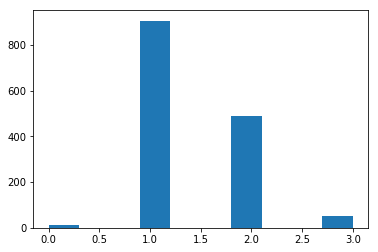

In [444]:
plt.hist(train['exterior_quality'])
# Not working - where is the plot?

(array([  1.00000000e+00,   0.00000000e+00,   2.80000000e+01,
          0.00000000e+00,   0.00000000e+00,   1.28200000e+03,
          0.00000000e+00,   1.46000000e+02,   0.00000000e+00,
          3.00000000e+00]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

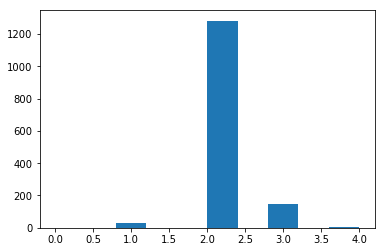

In [445]:
plt.hist(train['exterior_condition'])

In [446]:
train[['exterior_quality','exterior_condition']].corr()  # Correlation is just 0.009, good!

,exterior_quality,exterior_condition
exterior_quality,1.000000,0.009184
exterior_condition,0.009184,1.000000


In [447]:
import numpy as np
np.histogram(train.exterior_quality)

(array([ 14,   0,   0, 906,   0,   0, 488,   0,   0,  52], dtype=int64),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]))

###### Foundation: Type of foundation

In [448]:
print((train.Foundation.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((test.Foundation.value_counts().sort_values(ascending = False)/N*100).round(2))

PConc     44.32
CBlock    43.42
BrkTil    10.00
Slab       1.64
Stone      0.41
Wood       0.21
Name: Foundation, dtype: float64


In [449]:
# Building dummies and dropping some:
temp = pd.get_dummies(train.Foundation, prefix = "found")
temp.drop('found_Stone', axis=1, inplace = True)
temp.drop('found_Wood', axis=1, inplace = True)
train = pd.concat([train, temp], axis = 1)

In [450]:
temp = pd.get_dummies(test.Foundation, prefix = "found")
temp.drop('found_Stone', axis=1, inplace = True)
temp.drop('found_Wood', axis=1, inplace = True)
test = pd.concat([test, temp], axis = 1)

In [451]:
# print(pd.crosstab(train.found_PConc, train.Foundation))
# print(pd.crosstab(train.found_CBlock, train.Foundation))
# print(pd.crosstab(train.found_BrkTil, train.Foundation))
# print(pd.crosstab(train.found_Slab, train.Foundation))

In [452]:
# print(pd.crosstab(test.found_PConc, test.Foundation))
# print(pd.crosstab(test.found_CBlock, test.Foundation))
# print(pd.crosstab(test.found_BrkTil, test.Foundation))
# print(pd.crosstab(test.found_Slab, test.Foundation))

In [453]:
print(train.shape)
print(test.shape)

(1460, 158)
(1459, 157)


In [454]:
# correlations among them:
train[['found_BrkTil','found_CBlock','found_PConc', 'found_Slab']].corr()

,found_BrkTil,found_CBlock,found_PConc,found_Slab
found_BrkTil,1.000000,-0.292034,-0.297362,-0.043093
found_CBlock,-0.292034,1.000000,-0.781558,-0.113262
found_PConc,-0.297362,-0.781558,1.000000,-0.115328
found_Slab,-0.043093,-0.113262,-0.115328,1.000000


###### BsmtQual: Evaluates the height of the basement

Created quantitative variable bsmt_height

In [455]:
# Replacing NAs with 'None' in both data frames:
train['BsmtQual'].fillna('NoBasement', inplace=True)
test['BsmtQual'].fillna('NoBasement', inplace=True)

In [456]:
print((train.BsmtQual.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.BsmtQual.value_counts().sort_values(ascending = False)/N*100).round(2))

TA            44.45
Gd            42.33
Ex             8.29
NoBasement     2.53
Fa             2.40
Name: BsmtQual, dtype: float64
TA            43.42
Gd            40.48
Ex             9.38
Fa             3.63
NoBasement     3.01
Name: BsmtQual, dtype: float64


In [457]:
train['bsmt_height'] = 0
train.loc[(train.BsmtQual == 'Fa'), 'bsmt_height'] = 1
train.loc[(train.BsmtQual == 'TA'), 'bsmt_height'] = 2
train.loc[(train.BsmtQual == 'Gd'), 'bsmt_height'] = 3
train.loc[(train.BsmtQual == 'Ex'), 'bsmt_height'] = 4
pd.crosstab(train.BsmtQual, train.bsmt_height)

bsmt_height,0,1,2,3,4
BsmtQual,,,,,
Ex,0,0,0,0,121
Fa,0,35,0,0,0
Gd,0,0,0,618,0
NoBasement,37,0,0,0,0
TA,0,0,649,0,0


In [458]:
test['bsmt_height'] = 0
test.loc[(test.BsmtQual == 'Fa'), 'bsmt_height'] = 1
test.loc[(test.BsmtQual == 'TA'), 'bsmt_height'] = 2
test.loc[(test.BsmtQual == 'Gd'), 'bsmt_height'] = 3
test.loc[(test.BsmtQual == 'Ex'), 'bsmt_height'] = 4
pd.crosstab(test.BsmtQual, test.bsmt_height)

bsmt_height,0,1,2,3,4
BsmtQual,,,,,
Ex,0,0,0,0,137
Fa,0,53,0,0,0
Gd,0,0,0,591,0
NoBasement,44,0,0,0,0
TA,0,0,634,0,0


In [459]:
print(train.shape)
print(test.shape)

(1460, 159)
(1459, 158)


###### BsmtCond: Evaluates the general condition of the basement

In [460]:
# Replacing NAs with 'None' in both data frames:
train['BsmtCond'].fillna('NoBasement', inplace=True)
test['BsmtCond'].fillna('NoBasement', inplace=True)

In [461]:
print((train.BsmtCond.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.BsmtCond.value_counts().sort_values(ascending = False)/N*100).round(2))

TA            89.79
Gd             4.45
Fa             3.08
NoBasement     2.53
Po             0.14
Name: BsmtCond, dtype: float64
TA            88.70
Fa             4.04
Gd             3.90
NoBasement     3.08
Po             0.21
Name: BsmtCond, dtype: float64


In [462]:
train['bsmt_condition'] = 0
train.loc[(train.BsmtCond == 'Po'), 'bsmt_condition'] = 1
train.loc[(train.BsmtCond == 'Fa'), 'bsmt_condition'] = 2
train.loc[(train.BsmtCond == 'TA'), 'bsmt_condition'] = 3
train.loc[(train.BsmtCond == 'Gd'), 'bsmt_condition'] = 4
pd.crosstab(train.BsmtCond, train.bsmt_condition)

bsmt_condition,0,1,2,3,4
BsmtCond,,,,,
Fa,0,0,45,0,0
Gd,0,0,0,0,65
NoBasement,37,0,0,0,0
Po,0,2,0,0,0
TA,0,0,0,1311,0


In [463]:
test['bsmt_condition'] = 0
test.loc[(test.BsmtCond == 'Po'), 'bsmt_condition'] = 1
test.loc[(test.BsmtCond == 'Fa'), 'bsmt_condition'] = 2
test.loc[(test.BsmtCond == 'TA'), 'bsmt_condition'] = 3
test.loc[(test.BsmtCond == 'Gd'), 'bsmt_condition'] = 4
pd.crosstab(test.BsmtCond, test.bsmt_condition)

bsmt_condition,0,1,2,3,4
BsmtCond,,,,,
Fa,0,0,59,0,0
Gd,0,0,0,0,57
NoBasement,45,0,0,0,0
Po,0,3,0,0,0
TA,0,0,0,1295,0


In [464]:
print(train.shape)
print(test.shape)

(1460, 160)
(1459, 159)


In [465]:
train[['bsmt_height','bsmt_condition']].corr()  # Correlation is 0.536

,bsmt_height,bsmt_condition
bsmt_height,1.000000,0.535957
bsmt_condition,0.535957,1.000000


In [466]:
train[['found_Slab','bsmt_condition']].corr()  # Correlation is -0.69

,found_Slab,bsmt_condition
found_Slab,1.000000,-0.687403
bsmt_condition,-0.687403,1.000000


In [467]:
pd.crosstab(train.bsmt_condition, train.found_Slab)

found_Slab,0,1
bsmt_condition,,
0,13,24
1,2,0
2,45,0
3,1311,0
4,65,0


###### BsmtExposure: Refers to walkout or garden level walls

In [468]:
# Replacing NAs with 'None' in both data frames:
train['BsmtExposure'].fillna('NoBasement', inplace=True)
test['BsmtExposure'].fillna('NoBasement', inplace=True)

In [469]:
print((train.BsmtExposure.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.BsmtExposure.value_counts().sort_values(ascending = False)/N*100).round(2))

No            65.27
Av            15.14
Gd             9.18
Mn             7.81
NoBasement     2.60
Name: BsmtExposure, dtype: float64
No            65.14
Av            13.49
Gd             9.73
Mn             8.56
NoBasement     3.01
Name: BsmtExposure, dtype: float64


In [470]:
train['bsmt_exposure'] = 0
train.loc[(train.BsmtExposure == 'Mn'), 'bsmt_exposure'] = 1
train.loc[(train.BsmtExposure == 'Av'), 'bsmt_exposure'] = 2
train.loc[(train.BsmtExposure == 'Gd'), 'bsmt_exposure'] = 3
pd.crosstab(train.BsmtExposure, train.bsmt_exposure)

bsmt_exposure,0,1,2,3
BsmtExposure,,,,
Av,0,0,221,0
Gd,0,0,0,134
Mn,0,114,0,0
No,953,0,0,0
NoBasement,38,0,0,0


In [471]:
test['bsmt_exposure'] = 0
test.loc[(test.BsmtExposure == 'Mn'), 'bsmt_exposure'] = 1
test.loc[(test.BsmtExposure == 'Av'), 'bsmt_exposure'] = 2
test.loc[(test.BsmtExposure == 'Gd'), 'bsmt_exposure'] = 3
pd.crosstab(test.BsmtExposure, test.bsmt_exposure)

bsmt_exposure,0,1,2,3
BsmtExposure,,,,
Av,0,0,197,0
Gd,0,0,0,142
Mn,0,125,0,0
No,951,0,0,0
NoBasement,44,0,0,0


In [472]:
print(train.shape)
print(test.shape)

(1460, 161)
(1459, 160)


###### BsmtFinType1: Rating of basement finished area

Created 2 quantitative vars: bsmt_finished1 and bsmt_finished2

In [473]:
# Replacing NAs with 'None' in both data frames:
train['BsmtFinType1'].fillna('NoBasement', inplace=True)
train['BsmtFinType2'].fillna('NoBasement', inplace=True)
test['BsmtFinType1'].fillna('NoBasement', inplace=True)
test['BsmtFinType2'].fillna('NoBasement', inplace=True)

In [474]:
# print((train.BsmtFinType1.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((train.BsmtFinType2.value_counts().sort_values(ascending = False)/N*100).round(2))

In [475]:
# print((test.BsmtFinType1.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((test.BsmtFinType2.value_counts().sort_values(ascending = False)/N*100).round(2))

In [476]:
train['bsmt_finished1'] = 0
train.loc[(train.BsmtFinType1 == 'Unf'), 'bsmt_finished1'] = 1
train.loc[(train.BsmtFinType1 == 'LwQ'), 'bsmt_finished1'] = 1
train.loc[(train.BsmtFinType1 == 'BLQ'), 'bsmt_finished1'] = 2
train.loc[(train.BsmtFinType1 == 'Rec'), 'bsmt_finished1'] = 2
train.loc[(train.BsmtFinType1 == 'ALQ'), 'bsmt_finished1'] = 3
train.loc[(train.BsmtFinType1 == 'GLQ'), 'bsmt_finished1'] = 4
pd.crosstab(train.BsmtFinType1, train.bsmt_finished1)

bsmt_finished1,0,1,2,3,4
BsmtFinType1,,,,,
ALQ,0,0,0,220,0
BLQ,0,0,148,0,0
GLQ,0,0,0,0,418
LwQ,0,74,0,0,0
NoBasement,37,0,0,0,0
Rec,0,0,133,0,0
Unf,0,430,0,0,0


In [477]:
train['bsmt_finished2'] = 0
train.loc[(train.BsmtFinType2 == 'Unf'), 'bsmt_finished2'] = 1
train.loc[(train.BsmtFinType2 == 'LwQ'), 'bsmt_finished2'] = 1
train.loc[(train.BsmtFinType2 == 'BLQ'), 'bsmt_finished2'] = 2
train.loc[(train.BsmtFinType2 == 'Rec'), 'bsmt_finished2'] = 2
train.loc[(train.BsmtFinType2 == 'ALQ'), 'bsmt_finished2'] = 3
train.loc[(train.BsmtFinType2 == 'GLQ'), 'bsmt_finished2'] = 4
pd.crosstab(train.BsmtFinType2, train.bsmt_finished1)

bsmt_finished1,0,1,2,3,4
BsmtFinType2,,,,,
ALQ,0,9,6,0,4
BLQ,0,4,12,15,2
GLQ,0,7,5,2,0
LwQ,0,0,21,15,10
NoBasement,37,0,0,0,1
Rec,0,8,15,22,9
Unf,0,476,222,166,392


In [478]:
test['bsmt_finished1'] = 0
test.loc[(test.BsmtFinType1 == 'Unf'), 'bsmt_finished1'] = 1
test.loc[(test.BsmtFinType1 == 'LwQ'), 'bsmt_finished1'] = 1
test.loc[(test.BsmtFinType1 == 'BLQ'), 'bsmt_finished1'] = 2
test.loc[(test.BsmtFinType1 == 'Rec'), 'bsmt_finished1'] = 2
test.loc[(test.BsmtFinType1 == 'ALQ'), 'bsmt_finished1'] = 3
test.loc[(test.BsmtFinType1 == 'GLQ'), 'bsmt_finished1'] = 4
pd.crosstab(test.BsmtFinType1, test.bsmt_finished1)

bsmt_finished1,0,1,2,3,4
BsmtFinType1,,,,,
ALQ,0,0,0,209,0
BLQ,0,0,121,0,0
GLQ,0,0,0,0,431
LwQ,0,80,0,0,0
NoBasement,42,0,0,0,0
Rec,0,0,155,0,0
Unf,0,421,0,0,0


In [479]:
test['bsmt_finished2'] = 0
test.loc[(test.BsmtFinType2 == 'Unf'), 'bsmt_finished2'] = 1
test.loc[(test.BsmtFinType2 == 'LwQ'), 'bsmt_finished2'] = 1
test.loc[(test.BsmtFinType2 == 'BLQ'), 'bsmt_finished2'] = 2
test.loc[(test.BsmtFinType2 == 'Rec'), 'bsmt_finished2'] = 2
test.loc[(test.BsmtFinType2 == 'ALQ'), 'bsmt_finished2'] = 3
test.loc[(test.BsmtFinType2 == 'GLQ'), 'bsmt_finished2'] = 4
pd.crosstab(test.BsmtFinType2, test.bsmt_finished2)

bsmt_finished2,0,1,2,3,4
BsmtFinType2,,,,,
ALQ,0,0,0,33,0
BLQ,0,0,35,0,0
GLQ,0,0,0,0,20
LwQ,0,41,0,0,0
NoBasement,42,0,0,0,0
Rec,0,0,51,0,0
Unf,0,1237,0,0,0


In [480]:
print(train.shape)
print(test.shape)

(1460, 163)
(1459, 162)


###### Basement Square Footage - create a new var - share of finished

In [481]:
train['BsmtFinishedShare'] = 1 - train['BsmtUnfSF']/train['TotalBsmtSF']
train.loc[train.TotalBsmtSF == 0, 'BsmtFinishedShare'] = 0

In [482]:
test['BsmtFinishedShare'] = 1 - test['BsmtUnfSF']/test['TotalBsmtSF']
test.loc[test.TotalBsmtSF == 0, 'BsmtFinishedShare'] = 0

In [483]:
# train[['BsmtUnfSF','TotalBsmtSF','BsmtFinishedShare']]

In [484]:
train['BsmtFinishedShare'].corr(train['TotalBsmtSF'])  # correlation is 0.17

0.17388520502907454

In [485]:
train['BsmtFinishedShare'].corr(train['TotalBsmtSF'])  # correlation is 0.17

0.17388520502907454

In [486]:
test['BsmtUnfSF'].corr(test['TotalBsmtSF'])  # correlation is 0.41

0.40902319772896112

(array([ 501.,    5.,    2.,    5.,    6.,   11.,   16.,   13.,   14.,
          20.,   23.,   19.,   19.,   26.,   33.,   68.,   28.,   44.,
          33.,   48.,   47.,   60.,   57.,   62.,   68.,   38.,   50.,
          32.,   22.,   90.]),
 array([ 0.        ,  0.03333333,  0.06666667,  0.1       ,  0.13333333,
         0.16666667,  0.2       ,  0.23333333,  0.26666667,  0.3       ,
         0.33333333,  0.36666667,  0.4       ,  0.43333333,  0.46666667,
         0.5       ,  0.53333333,  0.56666667,  0.6       ,  0.63333333,
         0.66666667,  0.7       ,  0.73333333,  0.76666667,  0.8       ,
         0.83333333,  0.86666667,  0.9       ,  0.93333333,  0.96666667,  1.        ]),
 <a list of 30 Patch objects>)

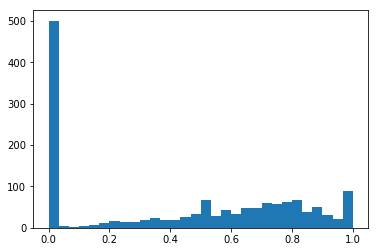

In [487]:
plt.hist(train.BsmtFinishedShare, bins = 30)

###### Heating: Type of heating - IGNORE, too little variance

In [488]:
print((train.Heating.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.Heating.value_counts().sort_values(ascending = False)/N*100).round(2))

GasA     97.81
GasW      1.23
Grav      0.48
Wall      0.27
OthW      0.14
Floor     0.07
Name: Heating, dtype: float64
GasA    99.04
GasW     0.62
Wall     0.14
Grav     0.14
Name: Heating, dtype: float64


###### HeatingQC: Heating quality and condition

Created quantitative variable 'heating_quality'

In [489]:
print((train.HeatingQC.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.HeatingQC.value_counts().sort_values(ascending = False)/N*100).round(2))

Ex    50.75
TA    29.32
Gd    16.51
Fa     3.36
Po     0.07
Name: HeatingQC, dtype: float64
Ex    51.51
TA    29.38
Gd    15.96
Fa     2.95
Po     0.14
Name: HeatingQC, dtype: float64


In [490]:
train['heating_quality'] = 0
train.loc[train.HeatingQC == 'Fa', 'heating_quality'] = 1
train.loc[train.HeatingQC == 'TA', 'heating_quality'] = 2
train.loc[train.HeatingQC == 'Gd', 'heating_quality'] = 3
train.loc[train.HeatingQC == 'Ex', 'heating_quality'] = 4
pd.crosstab(train.HeatingQC, train.heating_quality)

heating_quality,0,1,2,3,4
HeatingQC,,,,,
Ex,0,0,0,0,741
Fa,0,49,0,0,0
Gd,0,0,0,241,0
Po,1,0,0,0,0
TA,0,0,428,0,0


In [491]:
test['heating_quality'] = 0
test.loc[test.HeatingQC == 'Fa', 'heating_quality'] = 1
test.loc[test.HeatingQC == 'TA', 'heating_quality'] = 2
test.loc[test.HeatingQC == 'Gd', 'heating_quality'] = 3
test.loc[test.HeatingQC == 'Ex', 'heating_quality'] = 4
pd.crosstab(test.HeatingQC, test.heating_quality)

heating_quality,0,1,2,3,4
HeatingQC,,,,,
Ex,0,0,0,0,752
Fa,0,43,0,0,0
Gd,0,0,0,233,0
Po,2,0,0,0,0
TA,0,0,429,0,0


In [492]:
print(train.shape)
print(test.shape)

(1460, 165)
(1459, 164)


###### CentralAir: Central air conditioning

In [493]:
print((train.CentralAir.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.CentralAir.value_counts().sort_values(ascending = False)/N*100).round(2))

Y    93.49
N     6.51
Name: CentralAir, dtype: float64
Y    93.01
N     6.92
Name: CentralAir, dtype: float64


In [494]:
# Creating a dummy:
train['central_air'] = 0
train.loc[train.CentralAir == 'Y', 'central_air'] = 1
pd.crosstab(train.CentralAir, train.central_air)

central_air,0,1
CentralAir,,
N,95,0
Y,0,1365


In [495]:
test['central_air'] = 0
test.loc[test.CentralAir == 'Y', 'central_air'] = 1
pd.crosstab(test.CentralAir, test.central_air)

central_air,0,1
CentralAir,,
N,101,0
Y,0,1358


###### Electrical: Electrical system

In [496]:
print((train.Electrical.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.Electrical.value_counts().sort_values(ascending = False)/N*100).round(2))

SBrkr    91.37
FuseA     6.44
FuseF     1.85
FuseP     0.21
Mix       0.07
Name: Electrical, dtype: float64
SBrkr    91.58
FuseA     6.44
FuseF     1.58
FuseP     0.34
Name: Electrical, dtype: float64


In [497]:
# Creating 2 dummies:
train['elec_sbrkr'] = 0
train.loc[train.Electrical == 'SBrkr', 'elec_sbrkr'] = 1
train['elec_fuseA'] = 0
train.loc[train.Electrical == 'FuseA', 'elec_fuseA'] = 1

In [498]:
test['elec_sbrkr'] = 0
test.loc[test.Electrical == 'SBrkr', 'elec_sbrkr'] = 1
test['elec_fuseA'] = 0
test.loc[test.Electrical == 'FuseA', 'elec_fuseA'] = 1

In [499]:
print(train.shape)
print(test.shape)

(1460, 168)
(1459, 167)


###### KitchenQual: Kitchen quality

Created a numeric variable kitchen_quality

In [500]:
print((train.KitchenQual.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.KitchenQual.value_counts().sort_values(ascending = False)/N*100).round(2))

TA    50.34
Gd    40.14
Ex     6.85
Fa     2.67
Name: KitchenQual, dtype: float64
TA    51.85
Gd    38.70
Ex     7.19
Fa     2.12
Name: KitchenQual, dtype: float64


In [501]:
train['kitchen_quality'] = 0
train.loc[train.KitchenQual == 'TA', 'kitchen_quality'] = 1
train.loc[train.KitchenQual == 'Gd', 'kitchen_quality'] = 2
train.loc[train.KitchenQual == 'Ex', 'kitchen_quality'] = 3
pd.crosstab(train.KitchenQual, train.kitchen_quality)

kitchen_quality,0,1,2,3
KitchenQual,,,,
Ex,0,0,0,100
Fa,39,0,0,0
Gd,0,0,586,0
TA,0,735,0,0


In [502]:
test['kitchen_quality'] = 0
test.loc[test.KitchenQual == 'TA', 'kitchen_quality'] = 1
test.loc[test.KitchenQual == 'Gd', 'kitchen_quality'] = 2
test.loc[test.KitchenQual == 'Ex', 'kitchen_quality'] = 3
pd.crosstab(test.KitchenQual, test.kitchen_quality)

kitchen_quality,0,1,2,3
KitchenQual,,,,
Ex,0,0,0,105
Fa,31,0,0,0
Gd,0,0,565,0
TA,0,757,0,0


###### Functional: Home functionality (Assume typical unless deductions are warranted)

Created quantiative variable home_funct

In [503]:
# print((train.Functional.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((test.Functional.value_counts().sort_values(ascending = False)/N*100).round(2))

In [504]:
train['home_funct'] = 0
train.loc[train.Functional == 'Sev', 'home_funct'] = 0
train.loc[train.Functional == 'Maj2', 'home_funct'] = 1
train.loc[train.Functional == 'Maj1', 'home_funct'] = 1.5
train.loc[train.Functional == 'Mod', 'home_funct'] = 3
train.loc[train.Functional == 'Min2', 'home_funct'] = 5
train.loc[train.Functional == 'Min1', 'home_funct'] = 5.5
train.loc[train.Functional == 'Typ', 'home_funct'] = 7
pd.crosstab(train.Functional, train.home_funct)

home_funct,0.0,1.0,1.5,3.0,5.0,5.5,7.0
Functional,,,,,,,
Maj1,0,0,14,0,0,0,0
Maj2,0,5,0,0,0,0,0
Min1,0,0,0,0,0,31,0
Min2,0,0,0,0,34,0,0
Mod,0,0,0,15,0,0,0
Sev,1,0,0,0,0,0,0
Typ,0,0,0,0,0,0,1360


In [505]:
test['home_funct'] = 0
test.loc[test.Functional == 'Sev', 'home_funct'] = 0
test.loc[test.Functional == 'Maj2', 'home_funct'] = 1
test.loc[test.Functional == 'Maj1', 'home_funct'] = 1.5
test.loc[test.Functional == 'Mod', 'home_funct'] = 3
test.loc[test.Functional == 'Min2', 'home_funct'] = 5
test.loc[test.Functional == 'Min1', 'home_funct'] = 5.5
test.loc[test.Functional == 'Typ', 'home_funct'] = 7
pd.crosstab(test.Functional, test.home_funct)

home_funct,0.0,1.0,1.5,3.0,5.0,5.5,7.0
Functional,,,,,,,
Maj1,0,0,5,0,0,0,0
Maj2,0,4,0,0,0,0,0
Min1,0,0,0,0,0,34,0
Min2,0,0,0,0,36,0,0
Mod,0,0,0,20,0,0,0
Sev,1,0,0,0,0,0,0
Typ,0,0,0,0,0,0,1357


###### Fireplaces: Number of fireplaces

Create a new dummy: fireplace present vs. not
Create a new var that combines number of fireplaces with their quality?

In [506]:
print((train.Fireplaces.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.Fireplaces.value_counts().sort_values(ascending = False)/N*100).round(2))

0    47.26
1    44.52
2     7.88
3     0.34
Name: Fireplaces, dtype: float64
0    50.00
1    42.33
2     7.12
3     0.41
4     0.07
Name: Fireplaces, dtype: float64


In [507]:
print(train.shape)
print(test.shape)

(1460, 170)
(1459, 169)


###### FireplaceQu: Fireplace quality

Creating variable fireplace_quality
Consider no fireplace same as Poor quality - just for the sake of it

In [508]:
np.sum(train.FireplaceQu.isnull(), axis=0)/N*100

47.260273972602739

In [509]:
print((train.FireplaceQu.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.FireplaceQu.value_counts().sort_values(ascending = False)/N*100).round(2))

Gd    26.03
TA    21.44
Fa     2.26
Ex     1.64
Po     1.37
Name: FireplaceQu, dtype: float64
Gd    24.93
TA    19.11
Fa     2.81
Po     1.78
Ex     1.30
Name: FireplaceQu, dtype: float64


In [510]:
print(train.shape)
print(test.shape)

(1460, 170)
(1459, 169)


In [511]:
# Creating a quantitative variable - treating "no fireplace" as the worst level (zero)
train['fireplace_quality'] = 0
train.loc[train.FireplaceQu == 'Po', 'fireplace_quality'] = 1
train.loc[train.FireplaceQu == 'Fa', 'fireplace_quality'] = 1  # same as Ben Franklin Stove
train.loc[train.FireplaceQu == 'TA', 'fireplace_quality'] = 2
train.loc[train.FireplaceQu == 'Gd', 'fireplace_quality'] = 3
train.loc[train.Functional == 'Ex', 'fireplace_quality'] = 3.5
# pd.crosstab(train.FireplaceQu, train.fireplace_quality)

In [512]:
pd.crosstab(train.FireplaceQu, train.fireplace_quality)

fireplace_quality,0.0,1.0,2.0,3.0
FireplaceQu,,,,
Ex,24,0,0,0
Fa,0,33,0,0
Gd,0,0,0,380
Po,0,20,0,0
TA,0,0,313,0


In [513]:
test['fireplace_quality'] = 0
test.loc[test.FireplaceQu == 'Po', 'fireplace_quality'] = 1
test.loc[test.FireplaceQu == 'Fa', 'fireplace_quality'] = 1  # same as Ben Franklin Stove
test.loc[test.FireplaceQu == 'TA', 'fireplace_quality'] = 2
test.loc[test.FireplaceQu == 'Gd', 'fireplace_quality'] = 3
test.loc[test.Functional == 'Ex', 'fireplace_quality'] = 3.5
# pd.crosstab(test.FireplaceQu, test.fireplace_quality)

In [514]:
print(train.shape)
print(test.shape)

(1460, 171)
(1459, 170)


###### Dealing with Fireplaces (number of fireplaces)

In [515]:
# print((train.Fireplaces.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((test.Fireplaces.value_counts().sort_values(ascending = False)/N*100).round(2))

In [516]:
print(pd.crosstab(train.Fireplaces, train.fireplace_quality))
train['Fireplaces'].corr(train['fireplace_quality'])

fireplace_quality  0.0  1.0  2.0  3.0
Fireplaces                           
0                  690    0    0    0
1                   19   48  259  324
2                    4    4   53   54
3                    1    1    1    2


0.81402413283074637

In [517]:
# Replacing with NAs those values of fireplace_quality that were actually missing originally:
train.loc[(train.Fireplaces>0)&(train.fireplace_quality == 0), 'fireplace_quality'] = None

In [518]:
test.loc[(test.Fireplaces>0)&(test.fireplace_quality == 0), 'fireplace_quality'] = None

In [519]:
# Create product of fireplace_quality and Fireplaces:
train['fireplace_ttlscore'] = train['Fireplaces'] * train['fireplace_quality']
test['fireplace_ttlscore'] = test['Fireplaces'] * test['fireplace_quality']

In [520]:
print(train['Fireplaces'].corr(train['fireplace_quality']))
print(train['Fireplaces'].corr(train['fireplace_ttlscore']))
print(train['fireplace_quality'].corr(train['fireplace_ttlscore']))

0.847896723198
0.944974389693
0.909698813626


###### GarageType: Garage location

Building a quantitative var gar_type

In [521]:
print((train.GarageType.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.GarageType.value_counts().sort_values(ascending = False)/N*100).round(2))

Attchd     59.59
Detchd     26.51
BuiltIn     6.03
Basment     1.30
CarPort     0.62
2Types      0.41
Name: GarageType, dtype: float64
Attchd     58.42
Detchd     26.85
BuiltIn     6.71
Basment     1.16
2Types      1.16
CarPort     0.41
Name: GarageType, dtype: float64


In [522]:
# Creating a quantitative variable - treating "no garage" as the worst level (zero)
train['gar_type'] = 0
train.loc[train.GarageType == 'CarPort', 'gar_type'] = 1
train.loc[train.GarageType == 'Detchd', 'gar_type'] = 1.5
train.loc[train.GarageType == 'Attchd', 'gar_type'] = 2
train.loc[train.GarageType == 'Basment', 'gar_type'] = 2   # same as Attached
train.loc[train.GarageType == 'BuiltIn', 'gar_type'] = 2.5
train.loc[train.GarageType == '2Types', 'gar_type'] = 3
pd.crosstab(train.GarageType, train.gar_type)

gar_type,1.0,1.5,2.0,2.5,3.0
GarageType,,,,,
2Types,0,0,0,0,6
Attchd,0,0,870,0,0
Basment,0,0,19,0,0
BuiltIn,0,0,0,88,0
CarPort,9,0,0,0,0
Detchd,0,387,0,0,0


In [523]:
test['gar_type'] = 0
test.loc[test.GarageType == 'CarPort', 'gar_type'] = 1
test.loc[test.GarageType == 'Detchd', 'gar_type'] = 1.5
test.loc[test.GarageType == 'Attchd', 'gar_type'] = 2
test.loc[test.GarageType == 'Basment', 'gar_type'] = 2   # same as Attached
test.loc[test.GarageType == 'BuiltIn', 'gar_type'] = 2.5
test.loc[test.GarageType == '2Types', 'gar_type'] = 3
pd.crosstab(test.GarageType, test.gar_type)

gar_type,1.0,1.5,2.0,2.5,3.0
GarageType,,,,,
2Types,0,0,0,0,17
Attchd,0,0,853,0,0
Basment,0,0,17,0,0
BuiltIn,0,0,0,98,0
CarPort,6,0,0,0,0
Detchd,0,392,0,0,0


In [524]:
print(train.shape)
print(test.shape)

(1460, 173)
(1459, 172)


###### GarageYrBlt: Year garage was built

Unless there are other ideas - I'd suggest to drop the year garage was built for 3 reasons:
1. It's highly correlated (0.82) with year the house was built - see next cell.
2. 5.5% of people have no garage, so it's not clear how to code this variable when people have no garage.
3. When you guy a house you rarely care about the year it was built - you care about its size, location, condition.

In [525]:
train['GarageYrBlt'].corr(train['YearBuilt'])  # correlation is 0.82

0.82566748417434199

###### GarageFinish: Interior finish of the garage

In [526]:
print((train.GarageFinish.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.GarageFinish.value_counts().sort_values(ascending = False)/N*100).round(2))

Unf    41.44
RFn    28.90
Fin    24.11
Name: GarageFinish, dtype: float64
Unf    42.81
RFn    26.64
Fin    25.14
Name: GarageFinish, dtype: float64


In [527]:
# Creating a quantitative variable - treating "no garage" as the worst level (zero)
train['gar_finish'] = 0
train.loc[train.GarageFinish == 'Unf', 'gar_finish'] = 1
train.loc[train.GarageFinish == 'RFn', 'gar_finish'] = 2
train.loc[train.GarageFinish == 'Fin', 'gar_finish'] = 3
pd.crosstab(train.GarageFinish, train.gar_finish)

gar_finish,1,2,3
GarageFinish,,,
Fin,0,0,352
RFn,0,422,0
Unf,605,0,0


In [528]:
test['gar_finish'] = 0
test.loc[test.GarageFinish == 'Unf', 'gar_finish'] = 1
test.loc[test.GarageFinish == 'RFn', 'gar_finish'] = 2
test.loc[test.GarageFinish == 'Fin', 'gar_finish'] = 3
pd.crosstab(test.GarageFinish, test.gar_finish)

gar_finish,1,2,3
GarageFinish,,,
Fin,0,0,367
RFn,0,389,0
Unf,625,0,0


In [529]:
print(train.shape)
print(test.shape)

(1460, 174)
(1459, 173)


###### GarageCars: Size of garage in car capacity, GarageArea: Size of garage in square feet

Let's only use GarageCars (as is) and forget about GarageArea - garage square feet are correlated with GarageCars at 0.88 

In [530]:
# Can use as is:
print((train.GarageCars.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.GarageCars.value_counts().sort_values(ascending = False)/N*100).round(2))
train['GarageArea'].corr(train['GarageCars'])  # correlation is 0.88

2    56.44
1    25.27
3    12.40
0     5.55
4     0.34
Name: GarageCars, dtype: float64
2.0    52.74
1.0    27.88
3.0    13.22
0.0     5.21
4.0     0.75
5.0     0.07
Name: GarageCars, dtype: float64


0.88247541428146292

###### GarageQual: Garage quality

In [531]:
print((train.GarageQual.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.GarageQual.value_counts().sort_values(ascending = False)/N*100).round(2))

TA    89.79
Fa     3.29
Gd     0.96
Po     0.21
Ex     0.21
Name: GarageQual, dtype: float64
TA    88.56
Fa     5.21
Gd     0.68
Po     0.14
Name: GarageQual, dtype: float64


In [532]:
pd.crosstab(train.GarageQual, train.GarageCond)

GarageCond,Ex,Fa,Gd,Po,TA
GarageQual,,,,,
Ex,2,0,0,0,1
Fa,0,20,0,4,24
Gd,0,0,4,0,10
Po,0,0,0,3,0
TA,0,15,5,0,1291


In [533]:
# GarageQual
# Creating a quantitative variable - treating "no garage" as the average level (no headache)
train['gar_qual'] = 3
train.loc[train.GarageQual == 'Po', 'gar_qual'] = 1
train.loc[train.GarageQual == 'Fa', 'gar_qual'] = 2
train.loc[train.GarageQual == 'Gd', 'gar_qual'] = 3.5
train.loc[train.GarageQual == 'Ex', 'gar_qual'] = 4
pd.crosstab(train.GarageQual, train.gar_qual)

gar_qual,1.0,2.0,3.0,3.5,4.0
GarageQual,,,,,
Ex,0,0,0,0,3
Fa,0,48,0,0,0
Gd,0,0,0,14,0
Po,3,0,0,0,0
TA,0,0,1311,0,0


In [534]:
test['gar_qual'] = 3
test.loc[test.GarageQual == 'Po', 'gar_qual'] = 1
test.loc[test.GarageQual == 'Fa', 'gar_qual'] = 2
test.loc[test.GarageQual == 'Gd', 'gar_qual'] = 3.5
test.loc[test.GarageQual == 'Ex', 'gar_qual'] = 4
pd.crosstab(test.GarageQual, test.gar_qual)

gar_qual,1.0,2.0,3.0,3.5
GarageQual,,,,
Fa,0,76,0,0
Gd,0,0,0,10
Po,2,0,0,0
TA,0,0,1293,0


In [535]:
print((train.GarageCond.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.GarageCond.value_counts().sort_values(ascending = False)/N*100).round(2))

TA    90.82
Fa     2.40
Gd     0.62
Po     0.48
Ex     0.14
Name: GarageCond, dtype: float64
TA    90.96
Fa     2.67
Po     0.48
Gd     0.41
Ex     0.07
Name: GarageCond, dtype: float64


In [536]:
# GarageCond
# Creating a quantitative variable - treating "no garage" as the average level (no headache)
train['gar_cond'] = 2
train.loc[train.GarageCond == 'Po', 'gar_cond'] = 1
train.loc[train.GarageCond == 'Fa', 'gar_cond'] = 1.5
train.loc[train.GarageCond == 'Gd', 'gar_cond'] = 2.5
train.loc[train.GarageCond == 'Ex', 'gar_cond'] = 3
pd.crosstab(train.GarageCond, train.gar_cond)

gar_cond,1.0,1.5,2.0,2.5,3.0
GarageCond,,,,,
Ex,0,0,0,0,2
Fa,0,35,0,0,0
Gd,0,0,0,9,0
Po,7,0,0,0,0
TA,0,0,1326,0,0


In [537]:
test['gar_cond'] = 2
test.loc[test.GarageCond == 'Po', 'gar_cond'] = 1
test.loc[test.GarageCond == 'Fa', 'gar_cond'] = 1.5
test.loc[test.GarageCond == 'Gd', 'gar_cond'] = 2.5
test.loc[test.GarageCond == 'Ex', 'gar_cond'] = 3
pd.crosstab(test.GarageCond, test.gar_cond)

gar_cond,1.0,1.5,2.0,2.5,3.0
GarageCond,,,,,
Ex,0,0,0,0,1
Fa,0,39,0,0,0
Gd,0,0,0,6,0
Po,7,0,0,0,0
TA,0,0,1328,0,0


In [538]:
# Creating a new variable - product of garage quality & condition:
train['gar_perception'] = train['gar_qual'] * train['gar_cond']
test['gar_perception'] = test['gar_qual'] * test['gar_cond']

In [539]:
# pd.crosstab(train.gar_qual, train.gar_perception)
# pd.crosstab(train.gar_cond, train.gar_perception)

In [540]:
print(train.shape)
print(test.shape)

(1460, 177)
(1459, 176)


###### PavedDrive: Paved driveway

In [541]:
print((train.PavedDrive.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.PavedDrive.value_counts().sort_values(ascending = False)/N*100).round(2))

Y    91.78
N     6.16
P     2.05
Name: PavedDrive, dtype: float64
Y    89.11
N     8.63
P     2.19
Name: PavedDrive, dtype: float64


In [542]:
# Creating a quantitative variable
train['driveway'] = 0
train.loc[train.PavedDrive == 'P', 'driveway'] = 2
train.loc[train.PavedDrive == 'Y', 'driveway'] = 3
pd.crosstab(train.PavedDrive, train.driveway)

driveway,0,2,3
PavedDrive,,,
N,90,0,0
P,0,30,0
Y,0,0,1340


In [543]:
test['driveway'] = 0
test.loc[test.PavedDrive == 'P', 'driveway'] = 2
test.loc[test.PavedDrive == 'Y', 'driveway'] = 3
pd.crosstab(test.PavedDrive, test.driveway)

driveway,0,2,3
PavedDrive,,,
N,126,0,0
P,0,32,0
Y,0,0,1301


In [544]:
print(train.shape)
print(test.shape)

(1460, 178)
(1459, 177)


###### Correlations for Porches SF - are pretty low, let's keep them all

In [545]:
train[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch']].corr()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
WoodDeckSF,1.000000,0.058661,-0.125989,-0.032771,-0.074181
OpenPorchSF,0.058661,1.000000,-0.093079,-0.005842,0.074304
EnclosedPorch,-0.125989,-0.093079,1.000000,-0.037305,-0.082864
3SsnPorch,-0.032771,-0.005842,-0.037305,1.000000,-0.031436
ScreenPorch,-0.074181,0.074304,-0.082864,-0.031436,1.000000


###### PoolArea: Pool area in square feet & PoolQC- ignore, nobody has a pool

In [546]:
# plt.hist(test['PoolArea'])
# train.PoolArea.value_counts().sort_values(ascending = False)

In [547]:
print((train.PoolQC.value_counts().sort_values(ascending = False)/N*100).round(2))

Gd    0.21
Fa    0.14
Ex    0.14
Name: PoolQC, dtype: float64


###### Fence: Fence quality

Build a new var fence

In [548]:
print((train.Fence.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.Fence.value_counts().sort_values(ascending = False)/N*100).round(2))

MnPrv    10.75
GdPrv     4.04
GdWo      3.70
MnWw      0.75
Name: Fence, dtype: float64
MnPrv    11.78
GdPrv     4.04
GdWo      3.97
MnWw      0.07
Name: Fence, dtype: float64


In [549]:
train['fence'] = 0  # No fence are all zero 
train.loc[(train.Fence == 'MnWw')|(train.Fence == 'MnPrv'), 'fence'] = 0.5 # Minimum Wood or Minimum Privacy are 0.5
train.loc[(train.Fence == 'GdWo')|(train.Fence == 'GdPrv'), 'fence'] = 1.5
pd.crosstab(train.Fence, train.fence)

fence,0.5,1.5
Fence,,
GdPrv,0,59
GdWo,0,54
MnPrv,157,0
MnWw,11,0


In [550]:
test['fence'] = 0  # No fence are all zero 
test.loc[(test.Fence == 'MnWw')|(test.Fence == 'MnPrv'), 'fence'] = 0.5 # Minimum Wood or Minimum Privacy are 0.5
test.loc[(test.Fence == 'GdWo')|(test.Fence == 'GdPrv'), 'fence'] = 1.5
pd.crosstab(test.Fence, test.fence)

fence,0.5,1.5
Fence,,
GdPrv,0,59
GdWo,0,58
MnPrv,172,0
MnWw,1,0


In [551]:
print((train.fence.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.fence.value_counts().sort_values(ascending = False)/N*100).round(2))

0.0    80.75
0.5    11.51
1.5     7.74
Name: fence, dtype: float64
0.0    80.07
0.5    11.85
1.5     8.01
Name: fence, dtype: float64


###### MiscFeature: Miscellaneous feature not covered in other categories

In [552]:
print((train.MiscFeature.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.MiscFeature.value_counts().sort_values(ascending = False)/N*100).round(2))

Shed    3.36
Gar2    0.14
Othr    0.14
TenC    0.07
Name: MiscFeature, dtype: float64
Shed    3.15
Gar2    0.21
Othr    0.14
Name: MiscFeature, dtype: float64


In [553]:
# Build dummy variable 'shed':
train['shed'] = 0
train.loc[train.MiscFeature == 'Shed', 'shed'] = 1
pd.crosstab(train.MiscFeature, train.shed)

shed,0,1
MiscFeature,,
Gar2,2,0
Othr,2,0
Shed,0,49
TenC,1,0


In [554]:
test['shed'] = 0
test.loc[test.MiscFeature == 'Shed', 'shed'] = 1
pd.crosstab(test.MiscFeature, test.shed)

shed,0,1
MiscFeature,,
Gar2,3,0
Othr,2,0
Shed,0,46


###### MiscVal: $Value of miscellaneous feature - 96% are zeroes, but could use as is

In [555]:
# print((train.MiscVal.value_counts().sort_values(ascending = False)/N*100).round(2))

###### MoSold: Month Sold (MM) - could use as is

In [556]:
# print((train.MoSold.value_counts().sort_values(ascending = False)/N*100).round(2))

###### YrSold: Year Sold (YYYY) - could use as is

In [557]:
# print((train.YrSold.value_counts().sort_values(ascending = False)/N*100).round(2))

###### SaleType: Type of sale

In [558]:
print((train.SaleType.value_counts().sort_values(ascending = False)/N*100).round(2))

WD       86.78
New       8.36
COD       2.95
ConLD     0.62
ConLI     0.34
ConLw     0.34
CWD       0.27
Oth       0.21
Con       0.14
Name: SaleType, dtype: float64


In [559]:
# Build dummy variable 'sales_convent':
train['sales_convent'] = 0
train.loc[train.SaleType == 'WD', 'sales_convent'] = 1
# pd.crosstab(train.SaleType, train.sales_convent)

In [560]:
test['sales_convent'] = 0
test.loc[test.SaleType == 'WD', 'sales_convent'] = 1
# pd.crosstab(test.SaleType, test.sales_convent)

In [561]:
# Build dummy variable 'sales_new':
train['sales_new'] = 0
train.loc[train.SaleType == 'New', 'sales_new'] = 1
pd.crosstab(train.SaleType, train.sales_new)

sales_new,0,1
SaleType,,
COD,43,0
CWD,4,0
Con,2,0
ConLD,9,0
ConLI,5,0
ConLw,5,0
New,0,122
Oth,3,0
WD,1267,0


In [562]:
test['sales_new'] = 0
test.loc[test.SaleType == 'New', 'sales_new'] = 1
pd.crosstab(test.SaleType, test.sales_new)

sales_new,0,1
SaleType,,
COD,44,0
CWD,8,0
Con,3,0
ConLD,17,0
ConLI,4,0
ConLw,3,0
New,0,117
Oth,4,0
WD,1258,0


In [563]:
print(train.shape)
print(test.shape)

(1460, 182)
(1459, 181)


###### SaleCondition: Condition of sale

In [564]:
print((train.SaleCondition.value_counts().sort_values(ascending = False)/N*100).round(2))
print((test.SaleCondition.value_counts().sort_values(ascending = False)/N*100).round(2))

Normal     82.05
Partial     8.56
Abnorml     6.92
Family      1.37
Alloca      0.82
AdjLand     0.27
Name: SaleCondition, dtype: float64
Normal     82.47
Partial     8.22
Abnorml     6.10
Family      1.78
Alloca      0.82
AdjLand     0.55
Name: SaleCondition, dtype: float64


In [565]:
# Creating dummies based on SaleCondition and dropping two of them (with too few observations):
temp = pd.get_dummies(train.SaleCondition, prefix = "sale")
temp.drop('sale_Alloca', axis=1, inplace = True)
temp.drop('sale_AdjLand', axis=1, inplace = True)
train = pd.concat([train, temp], axis = 1)

In [566]:
temp = pd.get_dummies(test.SaleCondition, prefix = "sale")
temp.drop('sale_Alloca', axis=1, inplace = True)
temp.drop('sale_AdjLand', axis=1, inplace = True)
test = pd.concat([test, temp], axis = 1)

In [567]:
print(train.shape)
print(test.shape)

(1460, 186)
(1459, 185)


In [568]:
# print(train.columns)
# print(test.columns)

In [569]:
# misscounts = np.sum(train.isnull(), axis=0)/N*100
# print(misscounts[:40].round(2))
# print(misscounts[65:80].round(2))

###### YrSold: Year Sold (YYYY)

In [570]:
print((train.YrSold.value_counts().sort_values(ascending = False)/N*100).round(2))

2009    23.15
2007    22.53
2006    21.51
2008    20.82
2010    11.99
Name: YrSold, dtype: float64


In [571]:
train['salesyear_07'] = 0
train.loc[train.YrSold == 2007, 'salesyear_07'] = 1
train['salesyear_08'] = 0
train.loc[train.YrSold == 2008, 'salesyear_08'] = 1
train['salesyear_09'] = 0
train.loc[train.YrSold == 2009, 'salesyear_09'] = 1
train['salesyear_10'] = 0
train.loc[train.YrSold == 2010, 'salesyear_10'] = 1

In [572]:
test['salesyear_07'] = 0
test.loc[test.YrSold == 2007, 'salesyear_07'] = 1
test['salesyear_08'] = 0
test.loc[test.YrSold == 2008, 'salesyear_08'] = 1
test['salesyear_09'] = 0
test.loc[test.YrSold == 2009, 'salesyear_09'] = 1
test['salesyear_10'] = 0
test.loc[test.YrSold == 2010, 'salesyear_10'] = 1

In [573]:
# pd.crosstab(train.YrSold, train.salesyear_07)

In [574]:
print(train.shape)
print(test.shape)

(1460, 190)
(1459, 189)


###### MoSold: Month Sold (MM)

In [575]:
print((train.MoSold.value_counts().sort_values(ascending = False)/N*100).round(2))

6     17.33
7     16.03
5     13.97
4      9.66
8      8.36
3      7.26
10     6.10
11     5.41
9      4.32
12     4.04
1      3.97
2      3.56
Name: MoSold, dtype: float64


In [576]:
# Creating dummies based on SaleCondition and dropping two of them (with too few observations):
temp = pd.get_dummies(train.MoSold, prefix = "salesmo")
temp.drop('salesmo_1', axis=1, inplace = True)
temp.drop('salesmo_2', axis=1, inplace = True)
train = pd.concat([train, temp], axis = 1)

In [577]:
temp = pd.get_dummies(test.MoSold, prefix = "salesmo")
temp.drop('salesmo_1', axis=1, inplace = True)
temp.drop('salesmo_2', axis=1, inplace = True)
test = pd.concat([test, temp], axis = 1)

In [578]:
print(train.shape)
print(test.shape)

(1460, 200)
(1459, 199)


###### Building dummy 'remodeled' instead of YearRemodAdd

In [579]:
# Correlation year built and remodeled - we won't be using YearRemodAdd
train['YearBuilt'].corr(train['YearRemodAdd']) # 0.6

0.59285497634365036

In [580]:
# Build variable remodeled to be used instead of YearRemodAdd:
train['remodeled'] = 0
train.loc[train.YearBuilt != train.YearRemodAdd,'remodeled'] = 1

In [581]:
test['remodeled'] = 0
test.loc[test.YearBuilt != test.YearRemodAdd,'remodeled'] = 1

In [582]:
# pd.crosstab((train.YearBuilt-train.YearRemodAdd), train.remodeled)

In [583]:
pd.crosstab((train.remodeled), train.YearBuilt)

YearBuilt,1872,1875,1880,1882,1885,1890,1892,1893,1898,1900,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
remodeled,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,10,19,28,30,33,46,34,16,14,1
1,1,1,4,1,2,2,2,1,1,10,...,10,4,17,24,31,21,15,7,4,0


###### Summing the number of baths

Created 2 new variables: full_baths and half_baths

In [584]:
# print((train.BsmtFullBath.value_counts().sort_values(ascending = False)/N*100).round(2))

In [585]:
# print((train.BsmtHalfBath.value_counts().sort_values(ascending = False)/N*100).round(2))

In [586]:
# print((train.FullBath.value_counts().sort_values(ascending = False)/N*100).round(2))

In [587]:
# print((train.HalfBath.value_counts().sort_values(ascending = False)/N*100).round(2))

In [588]:
train['full_baths'] = train['BsmtFullBath'] + train['FullBath']
train['half_baths'] = train['BsmtHalfBath'] + train['HalfBath']

In [589]:
test['full_baths'] = test['BsmtFullBath'] + test['FullBath']
test['half_baths'] = test['BsmtHalfBath'] + test['HalfBath']

In [590]:
# No correlation between number of full and half baths:
train['full_baths'].corr(train['half_baths'])

0.010420063694912857

In [591]:
# train[['half_baths', 'BsmtHalfBath', 'HalfBath']]

In [592]:
print(train.shape)
print(test.shape)

(1460, 203)
(1459, 202)


**Averaging quality variables**

Creating one new variable -- average_quality
Includes: exterior_quality, heating_quality, kitchen_quality, OverallQual and bsmt_heigh

In [593]:
# print((train.exterior_quality.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((train.heating_quality.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((train.kitchen_quality.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((train.OverallQual.value_counts().sort_values(ascending = False)/N*100).round(2))
# We have to scale them before averaging - they are on different scales

In [594]:
# Standardizing quality variables before averaging them:

from sklearn.preprocessing import MinMaxScaler
temp = train[['exterior_quality', 'heating_quality', 'kitchen_quality', 'OverallQual', 'bsmt_height']]
scaler = MinMaxScaler()
temp_scaled = pd.DataFrame(scaler.fit_transform(temp), columns=temp.columns)
train['average_quality'] = temp_scaled.mean(axis = 1)

temp = test[['exterior_quality', 'heating_quality', 'kitchen_quality', 'OverallQual', 'bsmt_height']]
scaler = MinMaxScaler()
temp_scaled = pd.DataFrame(scaler.fit_transform(temp), columns=temp.columns)
test['average_quality'] = temp_scaled.mean(axis = 1)


In [595]:
print(train.shape)
print(test.shape)

(1460, 204)
(1459, 203)


**Dividing GrLivArea / TotRmsAbvGr -- New Variable**

In [596]:
train['room_size'] = train['GrLivArea'] / train['TotRmsAbvGrd']

In [597]:
test['room_size'] = test['GrLivArea'] / train['TotRmsAbvGrd']

In [598]:
print(train.shape)
print(test.shape)

(1460, 205)
(1459, 204)


###### Building house age variable:

In [599]:
train['age'] = train['YrSold'] - train['YearBuilt']
test['age'] = test['YrSold'] - test['YearBuilt']

###### Creating and average Garage-related variable:

In [600]:
# print((train.gar_type.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((train.GarageCars.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((train.gar_finish.value_counts().sort_values(ascending = False)/N*100).round(2))
# Similar range - so it's OK to take an average

In [601]:
# print((test.gar_type.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((test.GarageCars.value_counts().sort_values(ascending = False)/N*100).round(2))
# print((test.gar_finish.value_counts().sort_values(ascending = False)/N*100).round(2))
# Similar range - so it's OK to take an average

In [602]:
# giving more weight to the number of cars in the garage: GarageCars - because it's so important!
train['garage_perception'] = (train['gar_type'] + 2*train['GarageCars'] + train['gar_finish'])/3
test['garage_perception'] = (test['gar_type'] + 2*test['GarageCars'] + test['gar_finish'])/3

###### Missing values - we need to impute them for test for full_baths and half_baths before we can run our regressions

In [616]:
# Grab table of our variables as a pandas data frame
var_table = pd.read_csv('Data/House Prices Vars3.csv')
# var_table.head()
# Grab all quant vars and dummies that we want to keep
quant_vars_all = var_table.loc[(var_table['Variable Type'] == 'numeric')|(var_table['Variable Type'] == 'dummy'), 'Vars. to Use']
temp1 = train[quant_vars_all]
misscounts = np.sum(temp1.isnull(), axis=0)
print(misscounts.loc[misscounts>0])

temp2 = test[quant_vars_all]
misscounts2 = np.sum(temp2.isnull(), axis=0)
print(misscounts2.loc[misscounts2>0])
# There are missing values in test on full_baths, half_baths, MasVnrArea and firepalce_ttlscore

LotFrontage           259
MasVnrArea              8
fireplace_ttlscore     24
dtype: int64
garage_perception       1
full_baths              2
half_baths              2
LotFrontage           227
MasVnrArea             15
fireplace_ttlscore     19
dtype: int64


###### Imputing missing values for train and test

In [626]:
# quant_vars_all_train = pd.Series('SalePrice').append(quant_vars_all, ignore_index=True)
train2 = train[quant_vars_all].as_matrix()
test2 = test[quant_vars_all].as_matrix()
print(train2.shape)
print(test2.shape)

(1460, 104)
(1459, 104)


In [647]:
# test2

In [631]:
from fancyimpute import MICE

mice = MICE(n_imputations=100, impute_type='col',)  # In this line we can vary arguments for MICE
# I can't check what arguments MICE can take as I don't have the package installed
train2_filled = mice.complete(train2)
test2_filled = mice.complete(test2)


[MICE] Completing matrix with shape (1460, 104)
[MICE] Starting imputation round 1/110, elapsed time 0.004
[MICE] Starting imputation round 2/110, elapsed time 0.024
[MICE] Starting imputation round 3/110, elapsed time 0.040
[MICE] Starting imputation round 4/110, elapsed time 0.060
[MICE] Starting imputation round 5/110, elapsed time 0.076
[MICE] Starting imputation round 6/110, elapsed time 0.096
[MICE] Starting imputation round 7/110, elapsed time 0.116
[MICE] Starting imputation round 8/110, elapsed time 0.136
[MICE] Starting imputation round 9/110, elapsed time 0.160
[MICE] Starting imputation round 10/110, elapsed time 0.164
[MICE] Starting imputation round 11/110, elapsed time 0.180
[MICE] Starting imputation round 12/110, elapsed time 0.196
[MICE] Starting imputation round 13/110, elapsed time 0.222
[MICE] Starting imputation round 14/110, elapsed time 0.242
[MICE] Starting imputation round 15/110, elapsed time 0.262
[MICE] Starting imputation round 16/110, elapsed time 0.278
[

[MICE] Starting imputation round 29/110, elapsed time 0.796
[MICE] Starting imputation round 30/110, elapsed time 0.824
[MICE] Starting imputation round 31/110, elapsed time 0.852
[MICE] Starting imputation round 32/110, elapsed time 0.880
[MICE] Starting imputation round 33/110, elapsed time 0.908
[MICE] Starting imputation round 34/110, elapsed time 0.932
[MICE] Starting imputation round 35/110, elapsed time 0.956
[MICE] Starting imputation round 36/110, elapsed time 0.972
[MICE] Starting imputation round 37/110, elapsed time 1.003
[MICE] Starting imputation round 38/110, elapsed time 1.031
[MICE] Starting imputation round 39/110, elapsed time 1.059
[MICE] Starting imputation round 40/110, elapsed time 1.091
[MICE] Starting imputation round 41/110, elapsed time 1.115
[MICE] Starting imputation round 42/110, elapsed time 1.143
[MICE] Starting imputation round 43/110, elapsed time 1.171
[MICE] Starting imputation round 44/110, elapsed time 1.195
[MICE] Starting imputation round 45/110,

In [632]:
# From np arrays back to np dataframes:
train2 = pd.DataFrame(data = train2_filled, columns = quant_vars_all)
test2 = pd.DataFrame(data = test2_filled, columns = quant_vars_all)
print(train2.shape)
print(test2.shape)

(1460, 104)
(1459, 104)


In [633]:
# Addding back the DV SalePrice:
train2['SalePrice'] = train.SalePrice

In [646]:
pd.set_option('display.max_columns', 80)
# train[quant_vars_all].head()
np.sum(train.SalePrice == train2.SalePrice)

1460

In [604]:
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [648]:
temp1 = train2[quant_vars_all]
misscounts = np.sum(temp1.isnull(), axis=0)
print(misscounts.loc[misscounts>0])

temp2 = test2[quant_vars_all]
misscounts2 = np.sum(temp2.isnull(), axis=0)
print(misscounts2.loc[misscounts2>0])

Series([], dtype: int64)
Series([], dtype: int64)


###### Regressing age onto found_BrkTil, garage_perception, full_baths, and ext_VinylSd

In [606]:
# li(train)

In [649]:
# The residual 'age_residual' will be a new predictor instead of age:
from sklearn.linear_model import LinearRegression
X = train2[['found_BrkTil','garage_perception','full_baths', 'ext_VinylSd']]
y = train2['age']
lm = LinearRegression(fit_intercept=True, normalize=False)
lm.fit(X, y)
train2['age_residual'] = train2.age - lm.predict(X)

In [650]:
X = test2[['found_BrkTil','garage_perception','full_baths', 'ext_VinylSd']]
test2['age_residual'] = test2.age - lm.predict(X)

In [653]:
# test2.columns

###### Regressing average_quality onto found_BrkTil, garage_perception, full_baths, and ext_VinylSd

In [655]:
# The residual 'quality_residual' will be a new predictor instead of average_quality:
X = train2[['found_BrkTil','garage_perception','full_baths', 'ext_VinylSd']]
y = train2['average_quality']
lm = LinearRegression(fit_intercept=True, normalize=False)
lm.fit(X, y)
train2['quality_residual'] = train2.average_quality - lm.predict(X)

In [656]:
X = test2[['found_BrkTil','garage_perception','full_baths', 'ext_VinylSd']]
test2['quality_residual'] = test2.age - lm.predict(X)

###### Regressing LotFrontage onto LotArea and taking its residual instead as a predicto

In [680]:
X = train2[['LotArea']]
y = train2['LotFrontage']
lm = LinearRegression(fit_intercept=True, normalize=False)
lm.fit(X, y)
train2['frontage_residual'] = train2.LotFrontage - lm.predict(X)
X = test2[['LotArea']]
test2['frontage_residual'] = test2.LotFrontage - lm.predict(X)

In [672]:
temp = abs(train2['LotArea']**0.5 - train2['LotFrontage'])/train2['LotArea']**0.5


In [683]:
print(temp.corr(train2['SalePrice']))  # -0.12
print(temp.corr(train2['frontage_residual']))  # -0.61
print(temp.corr(train2['LotArea']))  # .44

-0.125210351521
-0.617274212471
0.158836442399


###### Regressing full_baths onto GrLivArea and bsmt_finished1 (and same thing for half_baths)

In [698]:
X = train2[['GrLivArea','bsmt_finished1']]
y = train2['full_baths']
lm = LinearRegression(fit_intercept=True, normalize=False)
lm.fit(X, y)
train2['fullbaths_residual'] = train2.full_baths - lm.predict(X)
X = test2[['GrLivArea', 'bsmt_finished1']]
test2['fullbaths_residual'] = test2.full_baths - lm.predict(X)

In [693]:
# For halfbaths - we regressed them only onto GrLivArea
X = train2[['GrLivArea']]
y = train2['half_baths']
lm = LinearRegression(fit_intercept=True, normalize=False)
lm.fit(X, y)
train2['halfbaths_residual'] = train2.half_baths - lm.predict(X)
X = test2[['GrLivArea']]
test2['halfbaths_residual'] = test2.half_baths - lm.predict(X)

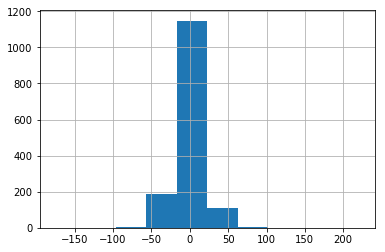

In [684]:
train2.frontage_residual.hist()

In [699]:
# plt.scatter(train2.style_2Story, train2.half_baths)

###### Correlations between all quant vars and our dummies and SalePrice

In [701]:
# Grab table of our variables as a pandas data frame
var_table = pd.read_csv('Data/House Prices Vars3.csv')
# var_table.head()
# Grab all quant vars and dummies that we want to keep
quant_vars_all = var_table.loc[(var_table['Variable Type'] == 'numeric')|(var_table['Variable Type'] == 'dummy'), 'Vars. to Use']
quant_vars_all = pd.Series('SalePrice').append(quant_vars_all, ignore_index=True)
# quant_vars_all
cor_quant = train2[quant_vars_all].corr()
cor_quant.to_csv('x quant dummies correlations.csv')

###### Saving down the data before imputation

In [ ]:
# train.to_csv("Data/train_prepped.csv")
# test.to_csv("Data/test_prepped.csv")

###### Function to identify outliers (will use it once we are done with feature engineering)

###### Important!
1. Only run it once we are done with feature engineering!
2. Only run after we've imputed missing values!
3. Only run after we've standardized (scaled) all predictors!

In [ ]:
# This cell is not working currently
# Import the function outliers' defined in file 'outliers.py':
from outliers import outliers
# import outliers
# outliers.outliers(df, ['a','b','c'], kneighbors = 5)

In [ ]:
outliers

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
outliers(df, ['a','b','c'], kneighbors = 5)

In [ ]:
# This function takes 3 arguments: data frame, list of column names, and # of neighbors
# It returns the original data frame with one extra column: 'distances'
# What does it do?
# 1. Calculates Euclidean distance for all observation pairs
# 2. For each observation it takes 'kneighbors' smallest distances and sums them up 
# 3. Puts those sums in a new column - 'distances'
# After it's done, we can inspect 'distances' column and toss those observations that have very high distances
# because high distances mean: This observation is very far even from its closest neighbors!

import scipy
from scipy.spatial.distance import pdist, squareform
def outliers(data, nameslist, kneighbors = 40):
    dist = pdist(data[nameslist], metric='euclidean')   # calculate distances b/w rows
    dist = squareform(dist)                             # turn it into a squared numpy array (square matrix)
    nrows = data.shape[0]                               # number of rows in our data frame
    distances = pd.Series([0.0] * nrows)                # create placeholder for distances
    for i in range(nrows):
        myarray = dist[i]
        myarray = myarray[~np.isnan(myarray)]           # remove NANs
        myarray = np.sort(myarray)[0:(kneighbors + 1)]  # sort (ascending) and take only kneighbors distances
        distances[i] = np.sum(myarray)                  # sum up distances to kneighbors similar neighbors
    data['distances'] = distances                       # add 'distances' as a new column
    return data

In [612]:
# Example how to use our outliers function:

# Generate Fake Pandas data frame (not related at all to our data)
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
a = pd.Series(np.random.normal(1, 0.1, 20))
df = pd.DataFrame(a, columns=['a'])
df['b'] = pd.Series(np.random.normal(2, 0.1, 20))
df['c'] = pd.Series(np.random.normal(3, 0.1, 20))
df['d'] = 2 * df['a'] + 1.5 * df['b'] - 1.3 * df['c'] + pd.Series(np.random.normal(0, 0.1, 20))
df.loc[0,'a'] = 10
df.loc[0,'b'] = 10
df.loc[1,'c'] = 10
# df.head

# Using our function to add distances:
# df = outliers(df, ['a','b','c'], kneighbors = 5)
df

,a,b,c,d
0,10.000000,10.000000,2.864207,1.309560
1,0.846342,2.143850,10.000000,1.189301
2,0.943714,2.034379,3.091837,1.006075
3,1.030307,1.839504,2.874612,1.134692
4,1.128211,1.899399,2.947225,1.043981
5,1.018563,2.045862,3.106370,0.966473
6,0.954476,2.056760,2.983139,1.040842
7,1.034999,1.999263,3.013261,1.120757
8,1.029293,2.004458,2.922608,1.257561
9,0.906297,1.887333,3.048764,0.842288


###### Looking at imputation - need to have package fancyimpute installed

In [613]:
# Again - using fake data df generated above
# Introducing missings on d
df.loc[2:5, 'd'] = None
df

,a,b,c,d
0,10.000000,10.000000,2.864207,1.309560
1,0.846342,2.143850,10.000000,1.189301
2,0.943714,2.034379,3.091837,NaN
3,1.030307,1.839504,2.874612,NaN
4,1.128211,1.899399,2.947225,NaN
5,1.018563,2.045862,3.106370,NaN
6,0.954476,2.056760,2.983139,1.040842
7,1.034999,1.999263,3.013261,1.120757
8,1.029293,2.004458,2.922608,1.257561
9,0.906297,1.887333,3.048764,0.842288


In [615]:
# I don't know yet if this code works with pandas data frames. I can't test it - because I can't install fnacyimpute yet
# Maybe we have to first make our data frame a matrix...

# Method: KNN
# from fancyimpute import KNN    
# Use 5 nearest rows which have a feature to fill in each row's missing features
# df_filled = KNN(k=5).complete(df)

# But I was thinking we should use a more powerfule method - MICE. Does this work?
from fancyimpute import MICE   
mice = MICE(n_imputations=100, impute_type='col')  # In this line we can vary arguments for MICE
# I can't check what arguments MICE can take as I don't have the package installed
df_filled = mice.complete(df)
df_filled

[MICE] Completing matrix with shape (20, 4)
[MICE] Starting imputation round 1/110, elapsed time 0.000
[MICE] Starting imputation round 2/110, elapsed time 0.148
[MICE] Starting imputation round 3/110, elapsed time 0.148
[MICE] Starting imputation round 4/110, elapsed time 0.148
[MICE] Starting imputation round 5/110, elapsed time 0.148
[MICE] Starting imputation round 6/110, elapsed time 0.148
[MICE] Starting imputation round 7/110, elapsed time 0.148
[MICE] Starting imputation round 8/110, elapsed time 0.148
[MICE] Starting imputation round 9/110, elapsed time 0.148
[MICE] Starting imputation round 10/110, elapsed time 0.148
[MICE] Starting imputation round 11/110, elapsed time 0.148
[MICE] Starting imputation round 12/110, elapsed time 0.148
[MICE] Starting imputation round 13/110, elapsed time 0.148
[MICE] Starting imputation round 14/110, elapsed time 0.148
[MICE] Starting imputation round 15/110, elapsed time 0.164
[MICE] Starting imputation round 16/110, elapsed time 0.164
[MICE

,a,b,c,d
0,10.000000,10.000000,2.864207,1.309560
1,0.846342,2.143850,10.000000,1.189301
2,1.073386,1.125945,1.119293,1.085313
3,1.073386,1.125945,1.119293,1.085313
4,1.073386,1.125945,1.119293,1.085313
5,1.073386,1.125945,1.119293,1.085313
6,0.954476,2.056760,2.983139,1.040842
7,1.034999,1.999263,3.013261,1.120757
8,1.029293,2.004458,2.922608,1.257561
9,0.906297,1.887333,3.048764,0.842288


In [ ]:
#list(train)

###### Looking at missing values on our quantitative variabels (not dummies)

Need to impute missings for LotFrontage (18% missing)

In [ ]:
temp = train[quant_vars]
misscounts3 = np.sum(temp.isnull(), axis=0)/N2*100
# print(misscounts3.round(2))

In [ ]:
# corrQuant.to_csv('x correlations for quant vars.csv')

In [ ]:
# print((train.Fireplaces.value_counts().sort_values(ascending = False)/N*100).round(2))

###### Exploring Correlations among variables in "dimensions" category

In [636]:
pd.set_option('display.max_columns', 50)
# corrDim = train[['SalePrice','LotArea','MasVnrArea','bsmt_height','BsmtUnfSF','TotalBsmtSF','BsmtFinishedShare',
#                  '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
#                  '3SsnPorch','ScreenPorch']].corr()
# corrDim

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corrDim, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corrDim, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

###### Visualization for a few categorical vars

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# train.boxplot(by='YrSold', column='SalePrice')
# Against our expectations - no difference

In [ ]:
# train.boxplot(by='MoSold', column='SalePrice')

In [ ]:
# train.boxplot(by=['YrSold','MoSold'], column='SalePrice', vert=False, figsize=(13,12))


In [ ]:
# temp = train.groupby(['YrSold','MoSold'])['SalePrice'].mean()
# temp.to_csv('x prices by year month.csv')
# train.groupby(['YrSold','MoSold']).size()
# test.groupby(["YrSold", "MoSold"]).size()

###### Correlations between all quant vars and our dummies and SalePrice

In [ ]:
# Grab table of our variables as a pandas data frame
var_table = pd.read_csv('Data/House Prices Vars3.csv')
# var_table.head()
# Grab all quant vars and dummies that we want to keep
quant_vars_all = var_table.loc[(var_table['Variable Type'] == 'numeric')|(var_table['Variable Type'] == 'dummy'), 'Vars. to Use']
quant_vars_all = pd.Series('SalePrice').append(quant_vars_all, ignore_index=True)
# quant_vars_all
cor_quant = train[quant_vars_all].corr()
cor_quant.to_csv('x quant dummies correlations.csv')

In [ ]:
# Rooms above ground:
# train[['KitchenAbvGr', 'BedroomAbvGr', 'TotRmsAbvGrd']].head()

In [ ]:
# GarageCars and gar_type correlatewd at 0.63
# pd.crosstab(train.GarageCars, train.gar_type)

#### Testing for quantitative variables tossed:

In [ ]:
# var_table = pd.read_csv('Data/House Prices Vars2.csv')
# var_table.head()

In [ ]:
# quant_vars_vt = var_table.loc[var_table['Variable Type'] == 'numeric', 'Vars. to Use']
# quant_vars_vt

In [ ]:
# quant_vars_vt.loc[[x not in quant_vars for x in quant_vars_vt]]
# what's in the quant_vars_vt list from google sheets but not in the quant_vars list.

In [ ]:
# pd.Series(quant_vars).loc[[x not in list(quant_vars_vt) for x in quant_vars]]
# what's in the quant_var list but not the quant_vars_vt list from google sheets.

#### Quantitative Variables:

In [ ]:
# quant_vars = list(quant_vars_vt)
# quant_vars.insert(0,'SalePrice')
# quant_vars

In [ ]:
# pd.set_option("display.max_columns",101)
# one_or_zero = train.isin([0,1]).all(axis = 0)
# num_cols = train.columns[~one_or_zero]
# list(num_cols)
# numeric_train = train[list(num_cols)]
# #whoops still need to remove character
# numeric_train = numeric_train.select_dtypes(exclude = ['object'])
# # numeric_train

### tossed numerics:

In [ ]:
#numeric_train.columns
# numeric_train.columns[[x not in quant_vars for x in numeric_train.columns]]

In [ ]:
#checking for any non quantitative numers in quant_vars
# pd.Series(quant_vars).loc[[x not in list(numeric_train.columns) for x in quant_vars]]

In [ ]:
#correlation matrix
# corrmat = train[quant_vars].corr()
# plt.subplots(figsize=(16, 12))
# sns.heatmap(corrmat, vmax=.8, square=True);

What can we see? Some bunches of correlation, but need to break them up into categories. 
 - top correlations
 - categories

In [ ]:
#saleprice correlation matrix
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
sns.set(style="white")


g = sns.PairGrid(train[cols], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [ ]:
from scipy.stats import norm, skew #for some statistics

# Check the skew of all numerical features
skewed_feats = train[quant_vars].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)

In [ ]:
# train[quant_vars].hist(figsize= (15,40), layout = (10,4))